# Project: Double pendulum
**Demonstration of the emergence of chaos from deterministic system**

<p style="color:red">A note to the reader: To show the animations optimally, please do not run all the animation cells together.</p>

Name: Lee Wen Wu (Steven)<br/>
Matriculation number: 3702409

## Table of contents <a id='TOC'></a>

1. [Introduction](#introduction)
2. [Motivation and aim of this project](#aim)
3. [Fundamentals](#fundamentals)
    1. [Defining the problem](#define)
    2. [Equations of motions](#eom)
4. [Simulation, animation, observation (or results) and discussion](#simulation)
    1. [Parameters and initial conditions](#first-initial)
    2. [Defining the main function](#main-function)
    3. [Solving the differential equations and plotting angles over time](#solve-ode1-plot)
    4. [Observation 1](#observation1)
    5. [Animations](#animation1)
        1. [The whole trajectory](#animation-whole)
    6. [Observation 2](#observation2)
    7. [Normal modes](#normal-modes)
    8. [Beat case or beat mode](#beat-modes)
        1. [Results (plots)](#beat-plots)
        2. [Phase space](#phase-space)
        3. [Animation of beat mode](#animation-beat)
    9. [Butterfly effect](#butterfly)
        1. [Results (plots)](#Results-butterfly)
        2. [Animation of the 2 double pendula](#animation-butterfly)
    10. [Observation 3](#observation3)
    11. [Stability](#stability)
        1. [Results (plots)](#beat-compare)
    12. [Observation 4](#observation4)
5. [Summary](#summary)
6. [Appendix](#appendix)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wg
from IPython.display import display
from scipy.integrate import odeint
from time import sleep,time
from threading import Thread
from ipycanvas import MultiCanvas, hold_canvas,Canvas

## add all the module imports here at the beginning, give our usual formatting options.
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

# default values for plotting
plt.rcParams.update({'axes.titlesize': 18,
                     'axes.labelpad': 10,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in'})

# center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Introduction <a id='introduction'></a>

Reference: [Wikipedia: Chaos theory](https://en.wikipedia.org/wiki/Chaos_theory#:~:text=Chaos%20theory%20is%20an%20interdisciplinary,fractals%2C%20and%20self%2Dorganization.)

Small differences in initial conditions, such as those due to errors in measurements or due to rounding errors in numerical computation, can yield widely diverging outcomes for chaotic dynamical systems, rendering long-term prediction of their behavior impossible in general.

This can happen even though these systems are deterministic, meaning that their future behavior follows a unique evolution and is fully determined by their initial conditions, with no random elements involved. In other words, the deterministic nature of these systems does not make them predictable. This behavior is known as deterministic chaos, or simply chaos. The theory was summarized by Edward Lorenz as:

> When the present determines the future, but the approximate present does not approximately determine the future.

An example of the emergence of chaos from deterministic system is the double pendulum. It is a simple physical system that exhibits rich dynamic behavior with a strong sensitivity to initial conditions.

## Motivation and aim of this project <a id='aim'></a>

1. To simulate the dynamics of double pendulum.
2. To demonstrate the emergence of chaos from fully deterministic system, which is the double pendulum in this case.
3. To demonstrate the famous Butterfly effect.

Jump to [table of contents](#TOC)

## Fundamentals <a id='fundamentals'></a>

<div align="right">Fig.1 <a id='figure1'></a>Schematic diagram of double pendulum</div>
<img src="setup.png" height="25%" width="25%" align="right" alt="Schematic diagram of double pendulum" title="double pendulum"/>

### Defining the problem <a id='define'></a>
We have to first find the equations of motion describing the system. It is not so easy to do so if we start directly in Newton's way (at least for me), which is to think in terms of all the forces acting on the particles. A better approach is to use **Lagrange mechanics**. 
However, if the reader is interested to see it in "Newton's way", I found a good [website](https://www.myphysicslab.com/pendulum/double-pendulum-en.html) describing it.

The algorithm that I employed while using Lagrange mechanics is:
1. Formulate the constraints. (Constraints are conditions which limit the free motion of the particles of a physical system )
2. Choose proper generalized coordinates $\mathbf{q}$.
3. Find the transformation formulas.
4. Write down the Lagrangian function $L$.
5. Derive and solve the Lagrange equation.

**Note:** 
1. Not every steps are shown below for tidyness. For more detailed (or step-by-step) calculations, please read the [appendix](#appendix). 
2. For simplicity, I have ignored any dissipative forces, e.g. friction, and also further assumed massless rods.

#### Constraints <a id='constraints'></a>

There are altogether four holonomic constraints for a planar double pendulum:

\begin{gather}
    z_1=z_2=\text{const}=0\\
    x_1^2+y_1^2=l_1^2\\
    (x_2-x_1)^2+(y_2-y_1)^2=l_2^2
\end{gather}

Hence the number of degrees of freedom ($3N$ for $N$ free particles) amounts to:

$$S=6-4=2$$

Jump to [Appendix: constraints](#append-constraints)

#### Generalized coordinate and transformation formulas <a id='coordinate'></a>

Convenient generalized coordinates are:

\begin{gather}
    q_1=\theta_1 \hspace{0.5in} q_2=\theta_2
\end{gather}

The transformation formulas:

\begin{gather}
    x_1=l_1\sin{\theta_1}\hspace{0.25in}y_1=-l_1\cos{\theta_1}\hspace{0.25in}z_1=0\\
    x_2=l_2\sin{\theta_2}+x_1\hspace{0.25in}y_2=-l_2\cos{\theta_2}+y_1\hspace{0.25in}z_2=0
\end{gather}

Jump to [Appendix: Generalized coordinate and transformation formulas](#append-coordinate)

#### Lagrangian, $L$ <a id='lagrangian'></a>

The Lagrangian $L=T-V$, where $T$ is the total kinetic energy, $V$ is the total potential energy. The kinetic energy is:

\begin{gather}
    T=\frac{1}{2}m_1(\dot{x}_1^2+\dot{y}_1^2)+\frac{1}{2}m_2(\dot{x}_2^2+\dot{y}_2^2)
\end{gather}

\begin{gather}
\dot{x}_1=l_1\cos{\theta_1}\dot{\theta}_1\hspace{0.25in}\dot{y}_1=l_1\sin{\theta_1}\dot{\theta}_1\\   \dot{x}_2=l_2\cos{\theta_2}\dot{\theta}_2+l_1\cos{\theta_1}\dot{\theta}_1\hspace{0.25in}\dot{y}_2=l_2\sin{\theta_2}\dot{\theta}_2+l_1\sin{\theta_1}\dot{\theta}_1
\end{gather}

Therefore:

\begin{gather}
T=\frac{1}{2}m_1l_1^2\dot{\theta}_1^2+\frac{1}{2}m_2[l_2^2\dot{\theta}_2^2+l_1^2\dot{\theta}_1^2+2l_1l_2\cos(\theta_1-\theta_2)\dot{\theta}_1\dot{\theta}_2]
\end{gather}

For the potential energy we find
\begin{gather}
\begin{split}
    V&=m_1gy_1+m_2gy_2\\
    &=-m_1gl_1\cos{\theta_1}-m_2g(l_2\cos{\theta_2}+l_1\cos{\theta_1})\\
    &=-g[(m_1+m_2)l_1\cos{\theta_1}+m_2l_2\cos{\theta_2}]
\end{split}
\end{gather}

Therefore
\begin{gather}
\begin{split}
    L&=T-V\\
    &=\frac{1}{2}m_1l_1^2\dot{\theta}_1^2+\frac{1}{2}m_2[l_2^2\dot{\theta}_2^2+l_1^2\dot{\theta}_1^2+2l_1l_2\cos(\theta_1-\theta_2)\dot{\theta}_1\dot{\theta}_2]+g[(m_1+m_2)l_1\cos{\theta_1}+m_2l_2\cos{\theta_2}]
\end{split}
\end{gather}

Jump to [Appendix: Lagrangian](#append-lagrangian)

#### Lagrange equations <a id='lagrange-eq'></a>

Since the constraints are holonomic and double pendulum is a conservative system, we can use the Langrange equation of second kind:

\begin{gather}
    \frac{d}{dt}\frac{\partial L}{\partial \dot{q}_j}-\frac{\partial L}{\partial q_j}=0
\end{gather}

Calculate all neccesary components and plug into Lagrange equation and get the first equation of motion:

\begin{gather}
\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}_1}-\frac{\partial L}{\partial \theta_1}=0\\
(m_1+m_2)l_1\ddot{\theta}_1+m_2l_2[\cos(\theta_1-\theta_2)\ddot{\theta}_2+\sin(\theta_1-\theta_2)\dot{\theta_2}^2]+g(m_1+m_2)\sin{\theta_1}=0
\end{gather}

Similar for the second generalized coordinate:

\begin{gather}
\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}_2}-\frac{\partial L}{\partial \theta_2}=0\\
l_2\ddot{\theta}_2-l_1[\sin(\theta_1-\theta_2)\dot{\theta}_1^2-\cos(\theta_1-\theta_2)\ddot{\theta}_1]+g\sin{\theta_2}=0
\end{gather}

Jump to [Appendix: Lagrange equation](#append-lagrange-eq)

#### Equations of motions <a id='eom'></a>

After some rearranging and substitutions, we obtain the following equations of motion:

\begin{gather}
\ddot{\theta}_1=\frac{m_2\cos(\theta_1-\theta_2)[g\sin{\theta_2}-l_1\sin(\theta_1-\theta_2)\dot{\theta}_1^2]-m_2l_2\sin(\theta_1-\theta_2)\dot{\theta_2}^2-g(m_1+m_2)\sin{\theta_1}}{[(m_1+m_2)-m_2\cos^2(\theta_1-\theta_2)]l_1}\\
\ddot{\theta}_2=\frac{(m_1+m_2)[g[\sin{\theta_2}+\sin{\theta_1}\cos(\theta_1-\theta_2)]-l_1\sin(\theta_1-\theta_2)\dot{\theta}_1^2]-m_2l_2\sin(\theta_1-\theta_2)\cos(\theta_1-\theta_2)\dot{\theta}_2^2}{[m_2\cos^2(\theta_1-\theta_2)-(m_1+m_2)]l_2}
\end{gather}

Jump to [table of contents](#TOC) or [Appendix: Equations of motions](#append-eom)

## Simulation, animation, observation (or results) and discussion <a id='simulation'></a>

### Parameters and initial conditions <a id='first-initial'></a>

To set the system's parameters and initial conditions. 

In [2]:
## Parameters

g=9.81 # gravitational acceleration on earth surface

print('Please hit enter after you have changed the values.')

## widgets for reader to enter parameters' values (displayed values are default values)
## mass of mass 1 in kg
m1text=wg.FloatText(value=3.0,description='$m_1$ [kg]')
display(m1text)

## mass of mass 2 in kg
m2text=wg.FloatText(value=4.0,description='$m_2$ [kg]')
display(m2text)

## length of rod connecting the pivot and mass 1 in meter
l1text=wg.FloatText(value=0.5,description='$l_1$ [m]')
display(l1text)

## length of rod connecting mass 1 and mass 2 in meter
l2text=wg.FloatText(value=1.0,description='$l_2$ [m]')
display(l2text)

Please hit enter after you have changed the values.


FloatText(value=3.0, description='$m_1$ [kg]')

FloatText(value=4.0, description='$m_2$ [kg]')

FloatText(value=0.5, description='$l_1$ [m]')

FloatText(value=1.0, description='$l_2$ [m]')

In [3]:
## Assign values from widget to variables.

m1=m1text.value
m2=m2text.value
l1=l1text.value
l2=l2text.value

We have 2 second order differential equations, therefore we need 4 initial conditions.

In [4]:
## Initial conditions

print('Please hit enter after you have changed the values.\n')

## widgets for reader to enter parameters' values (displayed values are default values)
ini_theta1text=wg.FloatText(value=180.0,description=r'$\theta_1$ [deg]')
display(ini_theta1text)

ini_theta2text=wg.FloatText(value=135.0,description=r'$\theta_2$ [deg]')
display(ini_theta2text)

ini_dottheta1text=wg.FloatText(value=18.0,description=r'$\dot{\theta}_1$ [deg/s]')
display(ini_dottheta1text)

ini_dottheta2text=wg.FloatText(value=0.0,description=r'$\dot{\theta}_2$ [deg/s]')
display(ini_dottheta2text)

Please hit enter after you have changed the values.



FloatText(value=180.0, description='$\\theta_1$ [deg]')

FloatText(value=135.0, description='$\\theta_2$ [deg]')

FloatText(value=18.0, description='$\\dot{\\theta}_1$ [deg/s]')

FloatText(value=0.0, description='$\\dot{\\theta}_2$ [deg/s]')

In [5]:
## Convert deg to rad and assign values from widget to variables.

ini_theta1=ini_theta1text.value*np.pi/180
ini_theta2=ini_theta2text.value*np.pi/180
ini_dottheta1=ini_dottheta1text.value*np.pi/180
ini_dottheta2=ini_dottheta2text.value*np.pi/180

state=np.array([ini_theta1,ini_dottheta1,ini_theta2,ini_dottheta2])

Jump to [table of contents](#TOC)

### Defining the function using equations of motion from [above](#eom) <a id='main-function'></a>

In [6]:
## Defining the function to solve the equation of motion

def double_pendulum(state,t):
    dtheta1dt=state[1]
    ## breaking the equation into shorter parts
    numerator1a=m2*np.cos(state[0]-state[2])*(g*np.sin(state[2])-l1*np.sin(state[0]-state[2])*state[1]**2)
    numerator1b=-m2*l2*np.sin(state[0]-state[2])*state[3]**2-(m1+m2)*g*np.sin(state[0])
    denominator1=l1*((m1+m2)-m2*np.cos(state[0]-state[2])**2)
    ddottheta1=(numerator1a+numerator1b)/denominator1
    
    dtheta2dt=state[3]
    numerator2a=(m1+m2)*(g*(np.sin(state[2])-np.sin(state[0])*np.cos(state[0]-state[2]))-l1*np.sin(state[0]-state[2])*state[1]**2)
    numerator2b=-m2*l2*np.sin(state[0]-state[2])*np.cos(state[0]-state[2])*state[3]**2
    denominator2=l2*(m2*np.cos(state[0]-state[2])**2 -m1-m2)
    ddottheta2=(numerator2a+numerator2b)/denominator2
    return np.array([dtheta1dt,ddottheta1,dtheta2dt,ddottheta2])

In [7]:
time=180  # total time to be simulated (in seconds)
N=5000   # number of timesteps for the simulation
t=np.linspace(0,time,N) # times at which the amplitudes shall be calculated

### Solving the differential equations and plotting angles over time <a id='solve-ode1-plot'></a>

In [8]:
#solve the differential equations
answer=odeint(double_pendulum,state,t)

# angles 
theta1=answer[:,0]
theta2=answer[:,2]

# angular velocities
omega1=answer[:,1]
omega2=answer[:,3]

#coordinates of the two masses
xdata1=l1*np.sin(theta1)
ydata1=l1*np.cos(theta1)
xdata2=l2*np.sin(theta2)+xdata1
ydata2=l2*np.cos(theta2)+ydata1

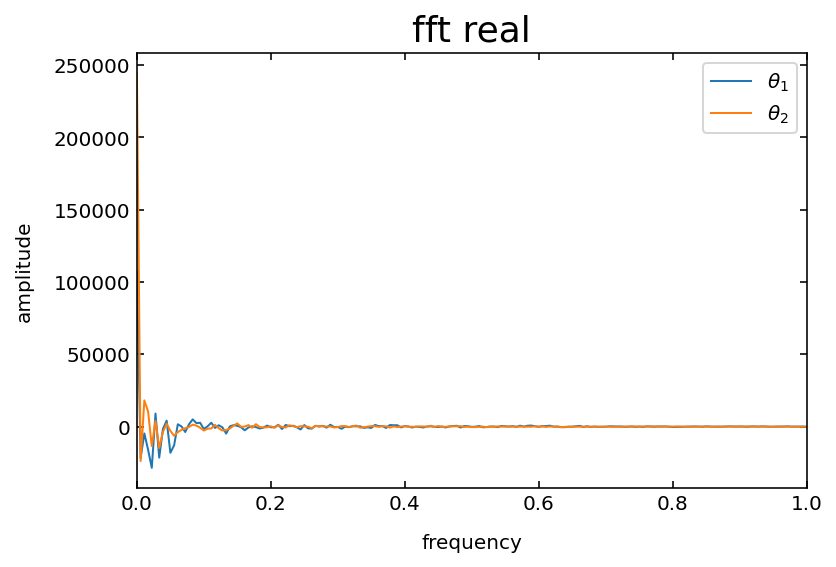

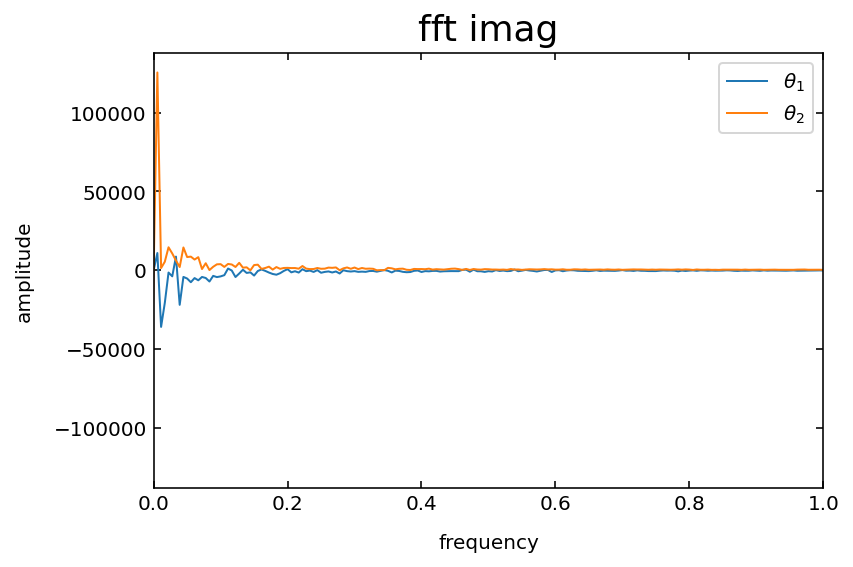

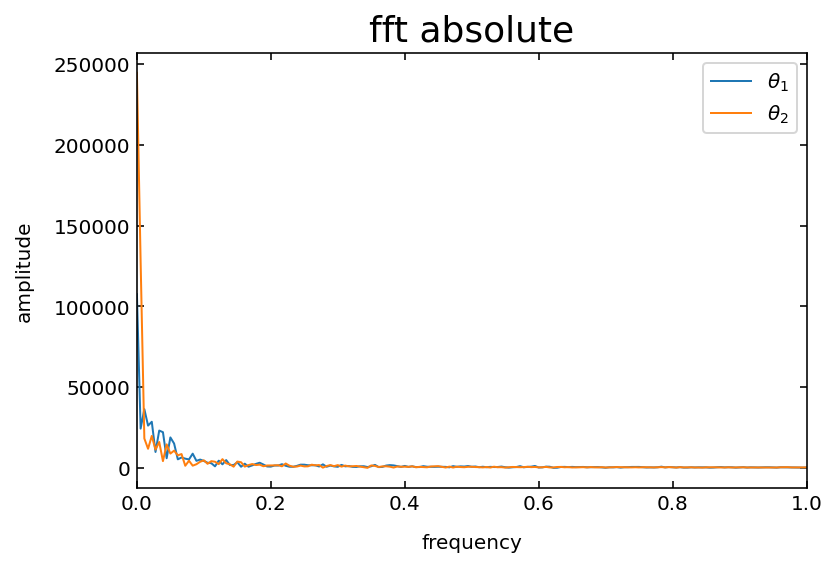

In [9]:
import numpy.fft as fft
import scipy.fftpack as fftp

x = t
u1 = theta1
u2 = theta2

ft = fft.fft(u1)
ft = fftp.fftshift(ft)
dx = (max(x)-min(x))/len(x)
f = fft.fftfreq(len(x), dx)
f = fftp.fftshift(f)

ft2 = fft.fft(u2)
ft2 = fftp.fftshift(ft2)

plt.plot(f, np.real(ft),label=r'$\theta_1$')
plt.plot(f, np.real(ft2),label=r'$\theta_2$')
plt.title('fft real')
plt.legend()
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.xlim(0, 1)
plt.show()

plt.plot(f, np.imag(ft),label=r'$\theta_1$')
plt.plot(f, np.imag(ft2),label=r'$\theta_2$')
plt.title('fft imag')
plt.legend()
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.xlim(0, 1)
plt.show()

plt.plot(f, np.abs(ft), label = r'$\theta_1$')
plt.plot(f, np.abs(ft2), label = r'$\theta_2$')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.legend()
plt.title('fft absolute')
plt.xlim(0, 1)
plt.show()

Note: plotted with [theta mod 360] & with 180 deg as turning point.

Examples: 181 deg --> 179 deg; 361 deg --> 1 deg; 270 deg --> 90 deg


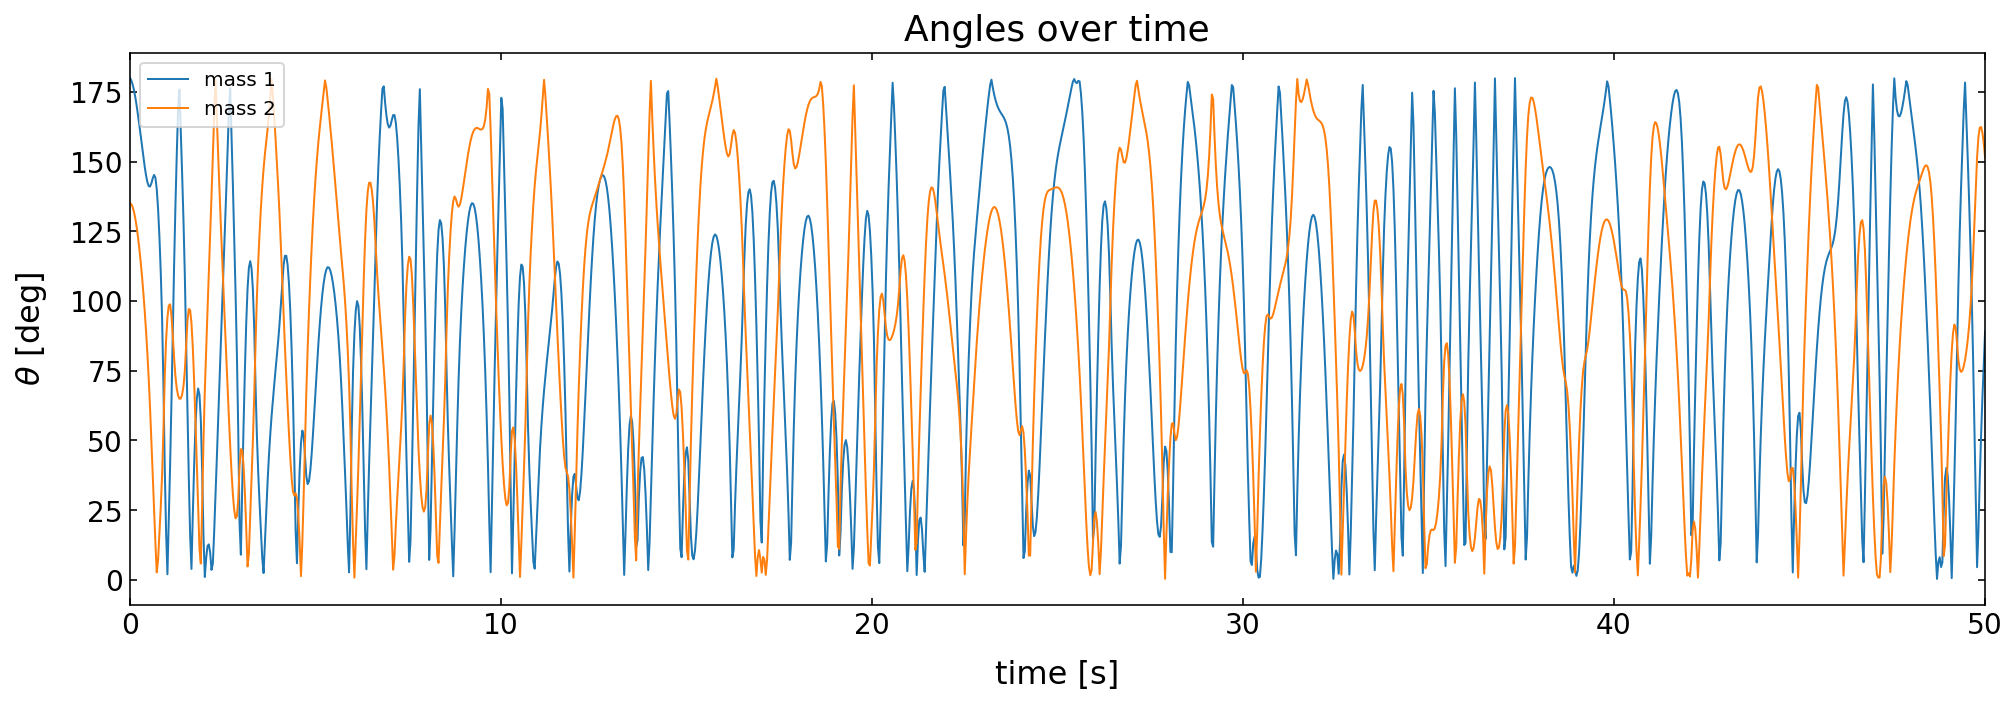

In [10]:
# Plotting angles over time (mod 360)

theta1mod=180-abs(180-(theta1*180/np.pi)%360)
theta2mod=180-abs(180-(theta2*180/np.pi)%360)

print('Note: plotted with [theta mod 360] & with 180 deg as turning point.\n')
print('Examples: 181 deg --> 179 deg; 361 deg --> 1 deg; 270 deg --> 90 deg')

plt.figure(figsize=(14,5))
plt.plot(t,theta1mod,label='mass 1')
plt.plot(t,theta2mod,label='mass 2')
plt.xlabel('time [s]', fontsize=16)
plt.ylabel(r'$\theta$ [deg]',fontsize=16)
plt.title('Angles over time')
plt.legend()
plt.tick_params(labelsize=14)
plt.tight_layout()  
plt.xlim(0,50)
plt.show()

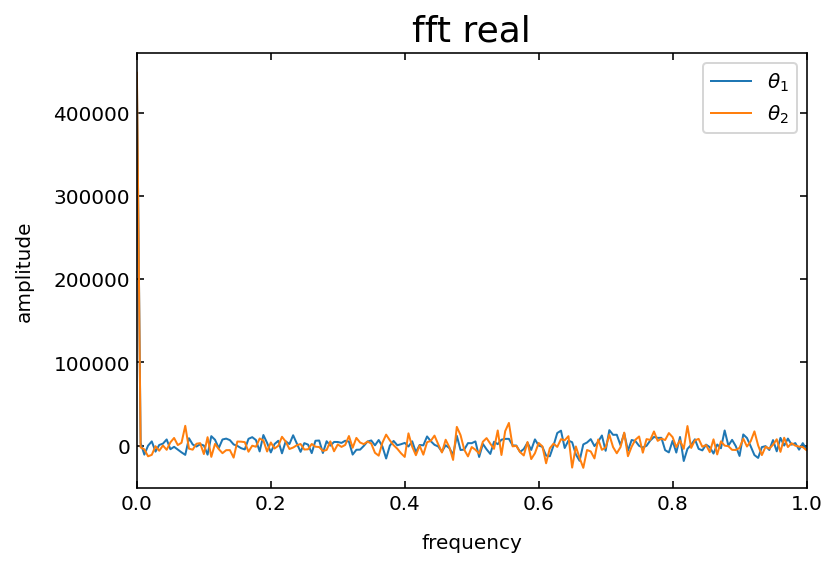

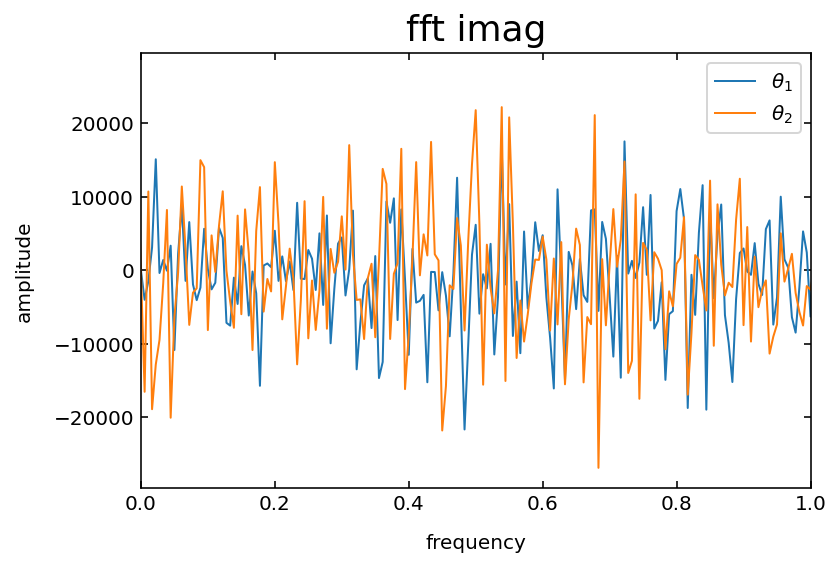

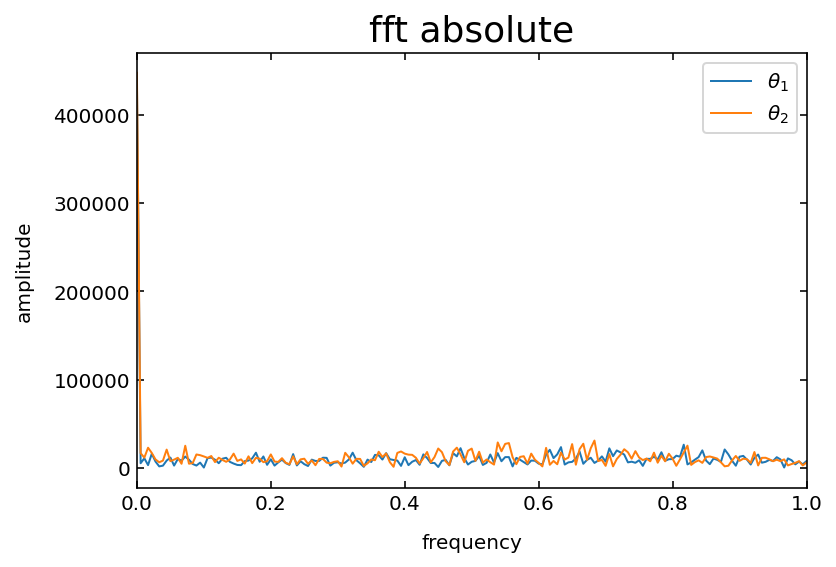

In [11]:
import numpy.fft as fft
import scipy.fftpack as fftp

x = t
u1 = theta1mod
u2 = theta2mod

ft = fft.fft(u1)
ft = fftp.fftshift(ft)
dx = (max(x)-min(x))/len(x)
f = fft.fftfreq(len(x), dx)
f = fftp.fftshift(f)

ft2 = fft.fft(u2)
ft2 = fftp.fftshift(ft2)

plt.plot(f, np.real(ft),label=r'$\theta_1$')
plt.plot(f, np.real(ft2),label=r'$\theta_2$')
plt.title('fft real')
plt.legend()
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.xlim(0, 1)
plt.show()

plt.plot(f, np.imag(ft),label=r'$\theta_1$')
plt.plot(f, np.imag(ft2),label=r'$\theta_2$')
plt.title('fft imag')
plt.legend()
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.xlim(0, 1)
plt.show()

plt.plot(f, np.abs(ft), label = r'$\theta_1$')
plt.plot(f, np.abs(ft2), label = r'$\theta_2$')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.legend()
plt.title('fft absolute')
plt.xlim(0, 1)
plt.show()

Note: plotted without [theta mod 360] & no turning point is set


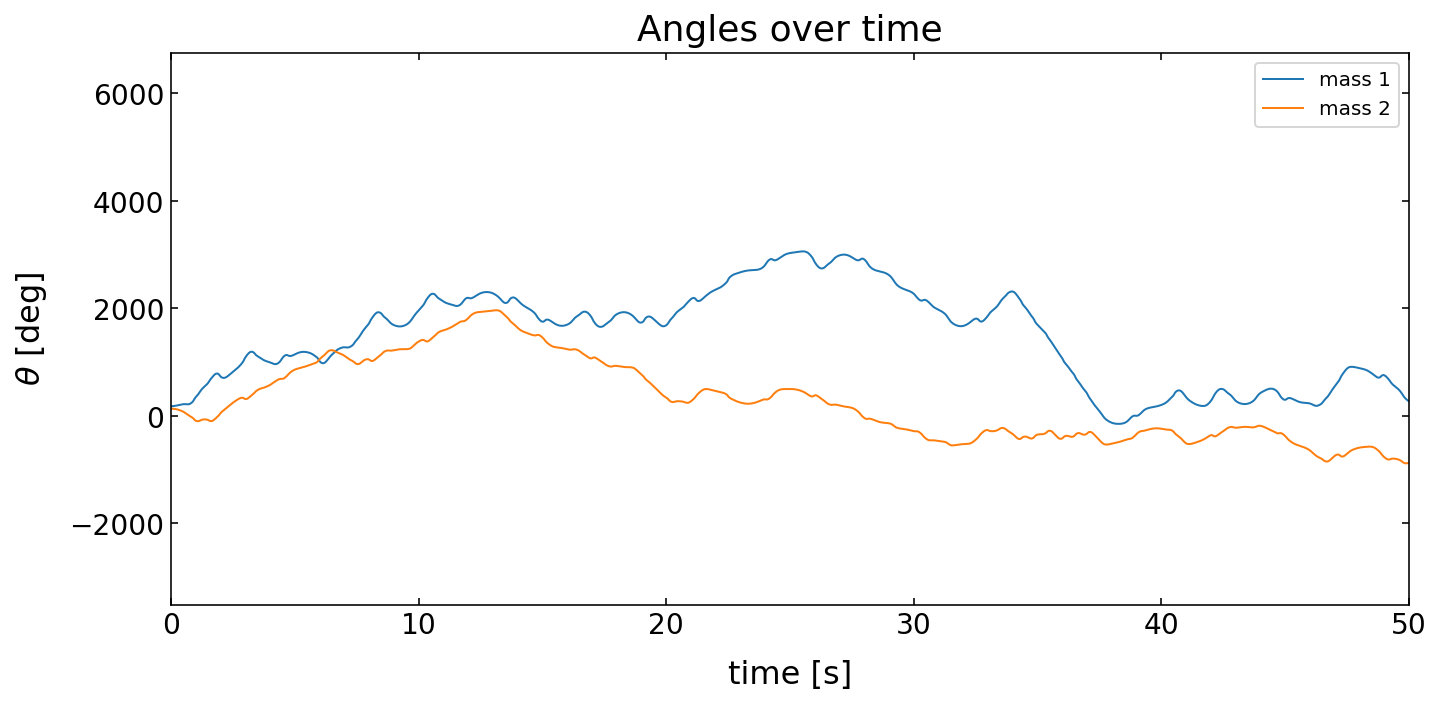

In [12]:
# Plotting angles over time (without mod 360)

print('Note: plotted without [theta mod 360] & no turning point is set')

plt.figure(figsize=(10,5))
plt.xlabel('time [s]', fontsize=16)
plt.ylabel(r'$\theta$ [deg]',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,(theta1*180/np.pi),label='mass 1')
plt.plot(t,(theta2*180/np.pi),label='mass 2')
plt.legend()
plt.title('Angles over time')
plt.tight_layout()  
plt.xlim(0,50)
plt.show()

Jump to [table of contents](#TOC)

Note: plotted with [theta mod 360] & with 180 deg as turning point


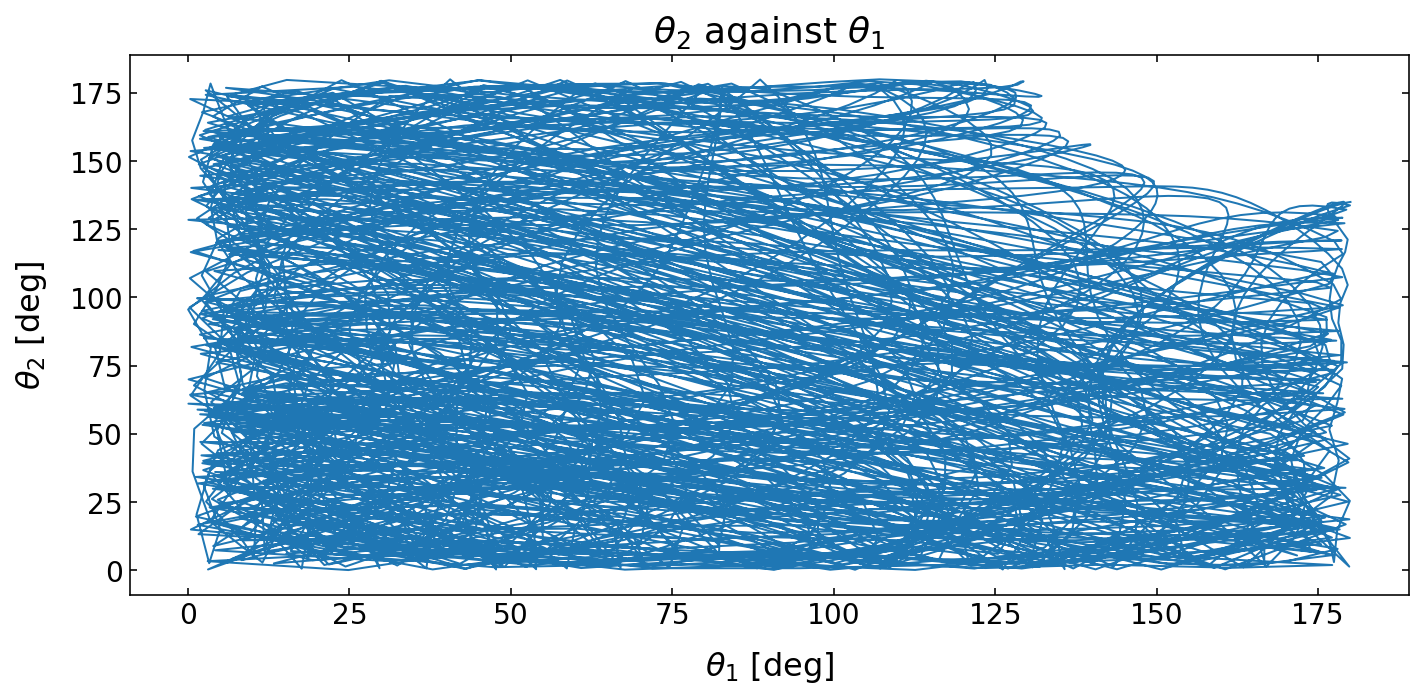

In [13]:
# Plotting theta2 against theta1 (with mod 360)

print('Note: plotted with [theta mod 360] & with 180 deg as turning point')
plt.figure(figsize=(10,5))
plt.xlabel(r'$\theta_1$ [deg]',fontsize=16)
plt.ylabel(r'$\theta_2$ [deg]',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(theta1mod,theta2mod)
plt.title(r'$\theta_2$ against $\theta_1$')
plt.tight_layout()  
# plt.xlim(0,50)
plt.show()

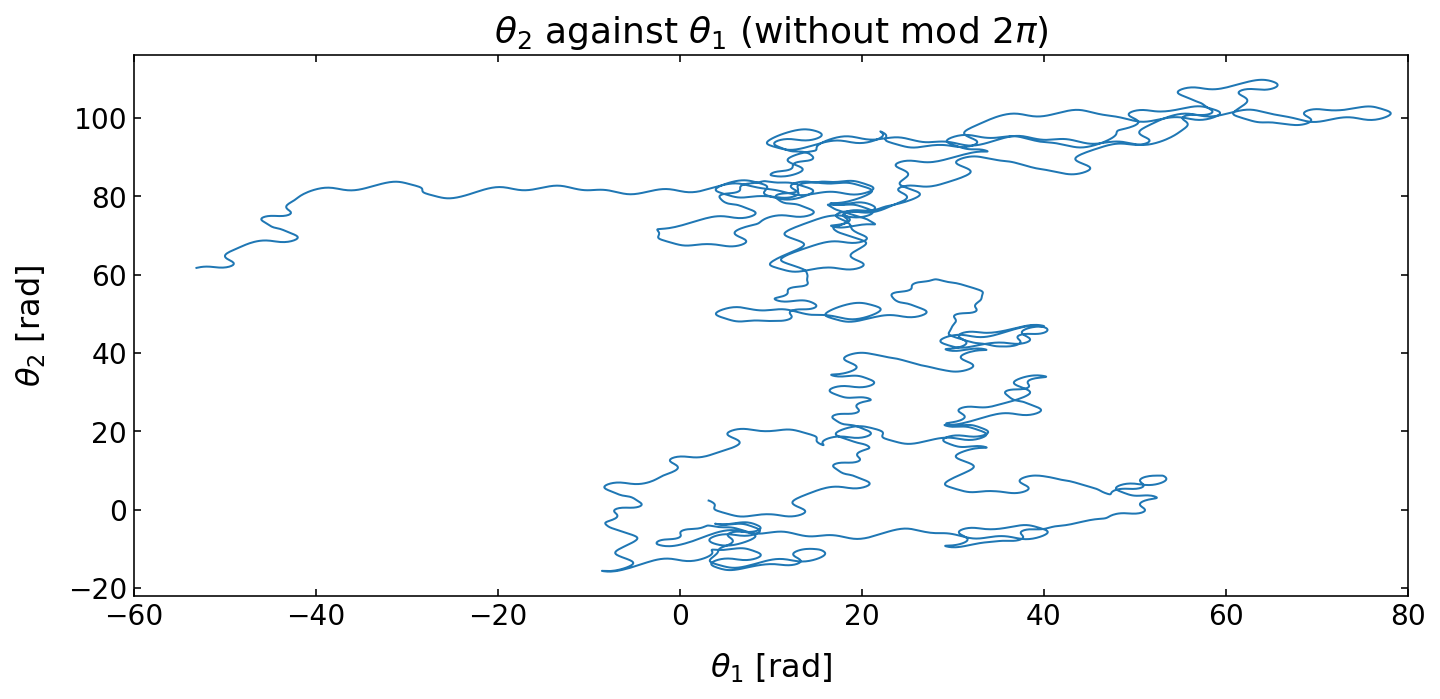

In [14]:
# Plotting theta2 against theta1 (without mod 2 pi)

plt.figure(figsize=(10,5))
plt.xlabel(r'$\theta_1$ [rad]',fontsize=16)
plt.ylabel(r'$\theta_2$ [rad]',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(theta1,theta2)
plt.title(r'$\theta_2$ against $\theta_1$ (without mod 2$\pi$)')
plt.tight_layout()  
plt.xlim(-60,80)
plt.show()

### Observation 1 <a id='observation1'></a>

We can see from the graphs that there are **no** recognizable pattern or regular periodic pattern. This demonstrate the **non-periodicity** of a chaotic system. According to [Wikipedia](https://en.wikipedia.org/wiki/Chaos_theory#Non-periodicity):

>A chaotic system may have sequences of values for the evolving variable (in our case: the angles) that exactly repeat themselves, giving periodic behavior starting from any point in that sequence. However, such periodic sequences are **repelling rather than attracting**, meaning that if the evolving variable is outside the sequence, however close, it will not enter the sequence and in fact will **diverge** from it. Thus for almost all initial conditions, the variable evolves chaotically with non-periodic behavior.

Jump to [table of contents](#TOC)

### Animations <a id='animation1'></a>

In [57]:
## create our canvas
canvas1 = Canvas(width=920, height=300)

In [16]:
scale=100 # scale meter to pixels, 1 meter = 100 pixels
off_x=canvas1.width/6 # offset in the horizontal direction of the canvas
off_y=canvas1.height/2 # vertical center of the canvas

In [17]:
def draw():
    for i in range(1,len(xdata1)): # start from 1 rather than 0 to not get any error when having xdata[i-1]
        canvas1.line_width = 1
        canvas1.global_alpha = 1 # make them slightly transparent

        with hold_canvas(canvas1):
            canvas1.clear() # clear the canvas before drawing

            ## draw the two connections between the pivot and mass 1, and between the masses
            canvas1.begin_path()          
            canvas1.move_to(off_x, off_y)
            canvas1.line_to(xdata1[i]*scale+off_x, ydata1[i]*scale+off_y)
            canvas1.move_to(xdata1[i]*scale+off_x, ydata1[i]*scale+off_y)
            canvas1.line_to(xdata2[i]*scale+off_x, ydata2[i]*scale+off_y)
            canvas1.stroke()

            ## draw the pivot point
            canvas1.fill_style = 'black' # fill color for pivot
            canvas1.fill_arc(off_x, off_y, 2, 0, 2*np.pi)

            ## draw the two masses
            canvas1.fill_style = 'red' # fill color for the 1st mass
            canvas1.fill_arc(xdata1[i]*scale+off_x, ydata1[i]*scale+off_y, 5, 0, 2*np.pi)
            canvas1.fill_style = 'blue' # fill color for the 2nd mass
            canvas1.fill_arc(xdata2[i]*scale+off_x, ydata2[i]*scale+off_y, 5, 0, 2*np.pi) 
            
            ## show the speed (longer tail--> faster)
            canvas1.begin_path()          
            canvas1.move_to(xdata1[i-1]*scale+3*off_x, ydata1[i-1]*scale+off_y)
            canvas1.line_to(xdata1[i]*scale+3*off_x, ydata1[i]*scale+off_y)
            canvas1.move_to(xdata2[i-1]*scale+3*off_x, ydata2[i-1]*scale+off_y)
            canvas1.line_to(xdata2[i]*scale+3*off_x, ydata2[i]*scale+off_y)
            canvas1.line_width=0.5
            canvas1.stroke()
            canvas1.fill_style = 'red' 
            canvas1.fill_arc(xdata1[i]*scale+3*off_x, ydata1[i]*scale+off_y, 2, 0, 2*np.pi)
            canvas1.fill_style = 'blue' 
            canvas1.fill_arc(xdata2[i]*scale+3*off_x, ydata2[i]*scale+off_y, 2, 0, 2*np.pi) 
            
            ## show the partial trajectory (only for 30 steps long)
            if i<30: # draw the first step to the 30th step trajectory
                j=i
                while j<30 and j!=0: 
                    canvas1.begin_path()
                    canvas1.move_to(xdata1[j-1]*scale+5*off_x, ydata1[j-1]*scale+off_y)
                    canvas1.line_to(xdata1[j]*scale+5*off_x, ydata1[j]*scale+off_y)
                    canvas1.move_to(xdata2[j-1]*scale+5*off_x, ydata2[j-1]*scale+off_y)
                    canvas1.line_to(xdata2[j]*scale+5*off_x, ydata2[j]*scale+off_y)
                    canvas1.line_width=0.5
                    canvas1.stroke()
                    j=j-1
                canvas1.fill_style = 'red' 
                canvas1.fill_arc(xdata1[i]*scale+5*off_x, ydata1[i]*scale+off_y, 2, 0, 2*np.pi)
                canvas1.fill_style = 'blue' 
                canvas1.fill_arc(xdata2[i]*scale+5*off_x, ydata2[i]*scale+off_y, 2, 0, 2*np.pi)
            else: # draw the (i-30)th step to the (i)th step trajectory
                j=i
                while j>(i-30):
                    canvas1.begin_path()          
                    canvas1.move_to(xdata1[j-1]*scale+5*off_x, ydata1[j-1]*scale+off_y)
                    canvas1.line_to(xdata1[j]*scale+5*off_x, ydata1[j]*scale+off_y)
                    canvas1.move_to(xdata2[j-1]*scale+5*off_x, ydata2[j-1]*scale+off_y)
                    canvas1.line_to(xdata2[j]*scale+5*off_x, ydata2[j]*scale+off_y)
                    canvas1.line_width=0.5
                    canvas1.stroke()
                    j=j-1
                canvas1.fill_style = 'red' 
                canvas1.fill_arc(xdata1[i]*scale+5*off_x, ydata1[i]*scale+off_y, 2, 0, 2*np.pi)
                canvas1.fill_style = 'blue' 
                canvas1.fill_arc(xdata2[i]*scale+5*off_x, ydata2[i]*scale+off_y, 2, 0, 2*np.pi)
                
            ## sleep a timestep after drawing
            sleep(t[1]-t[0]) 

In [18]:
simulation = Thread(target=draw)  

In [19]:
display(canvas1)
canvas1.flush()
simulation.start() # starts animation

Canvas(height=300, width=920)

#### Description

1. The left side shows the animation of the double pendulum. 
2. The middle one helps us to "see" the speed of the masses. Longer tail means moving faster.
3. The right side shows the partial trajectory taken by the masses.

Jump to [table of contents](#TOC)

#### The whole trajectory <a id='animation-whole'></a>

In [20]:
## create our canvas3
canvas3 = Canvas(width=610, height=300)

In [21]:
scale=100
off_x3=canvas3.width/4 
off_y3=canvas3.height/2

In [22]:
def draw3():
    for i in range(1,len(xdata1)):
        canvas3.line_width = 1
        canvas3.global_alpha = 1 

        with hold_canvas(canvas3):
            ## 'undraw' the lines, but not the masses to show shadow trajectory
            canvas3.begin_path()          
            canvas3.move_to(off_x3, off_y3)
            canvas3.line_to(xdata1[i-1]*scale+off_x3, ydata1[i-1]*scale+off_y3)
            canvas3.move_to(xdata1[i-1]*scale+off_x3, ydata1[i-1]*scale+off_y3)
            canvas3.line_to(xdata2[i-1]*scale+off_x3, ydata2[i-1]*scale+off_y3)
            canvas3.stroke_style='white'
            canvas3.line_width=2.5
            canvas3.stroke()
            
            ## draw the two connections to the pivot
            canvas3.begin_path()          
            canvas3.move_to(off_x3, off_y3)
            canvas3.line_to(xdata1[i]*scale+off_x3, ydata1[i]*scale+off_y3)
            canvas3.move_to(xdata1[i]*scale+off_x3, ydata1[i]*scale+off_y3)
            canvas3.line_to(xdata2[i]*scale+off_x3, ydata2[i]*scale+off_y3)
            canvas3.line_width=1.0
            canvas3.stroke_style='black'
            canvas3.stroke()
            
            ## draw the pivot point
            canvas3.fill_style = 'black' # fill color for pivot
            canvas3.fill_arc(off_x3, off_y3, 2, 0, 2*np.pi)
            
            ## draw the two masses
            canvas3.fill_style = 'red' # fill color for the 1st mass
            canvas3.fill_arc(xdata1[i]*scale+off_x3, ydata1[i]*scale+off_y3, 1, 0, 2*np.pi)
            canvas3.fill_style = 'blue' # fill color for the 2nd mass
            canvas3.fill_arc(xdata2[i]*scale+off_x3, ydata2[i]*scale+off_y3, 1, 0, 2*np.pi)
            
            ## draw the trajectory
            canvas3.begin_path()          
            canvas3.move_to(xdata1[i-1]*scale+3*off_x3, ydata1[i-1]*scale+off_y3)
            canvas3.line_to(xdata1[i]*scale+3*off_x3, ydata1[i]*scale+off_y3)
            canvas3.move_to(xdata2[i-1]*scale+3*off_x3, ydata2[i-1]*scale+off_y3)
            canvas3.line_to(xdata2[i]*scale+3*off_x3, ydata2[i]*scale+off_y3)
            canvas3.line_width=0.5
            canvas3.stroke()
            
            ## sleep a timestep after drawing
            sleep(t[1]-t[0]) 

In [23]:
simulation3 = Thread(target=draw3)  

In [24]:
display(canvas3)
canvas3.flush()
simulation3.start() 

Canvas(height=300, width=610)

Jump to [table of contents](#TOC)

### Observation 2 <a id='observation2'></a>

1. We see that mass 1 can only traverse the inner circle, due to its length constraint.
2. The furthest distance mass 2 can travel from the pivot is the outer circle, due to the length constraints.
3. The masses spend more time at the lower part of the circles due to gravity, which is represented by the denser path concentration at the lower part.
4. The second mass can only touch but not cross the inner circle because of the length constraints (if the length of the rod connecting mass 2 is twice the one connecting the pivot and mass 1)

## Normal modes <a id='normal-modes'></a>

A normal mode of an oscillating system is a pattern of motion in which all parts of the system move sinusoidally with the same frequency and with a fixed phase relation. For two coupled pendula (our double pendulum is also a kind of coupled pendula) there are two normal modes, where both pendula move with the same frequency. We may force the system into one of its normal modes, by specifying its initial conditions properly.

However, due to my lack of knowledge, I am not able to find out the initial conditions neccessary to acheive the pure normal modes. I am very sorry about it. For readers who are interested about the theory behind it might find this [paper](https://link.springer.com/article/10.1007/s11071-019-05424-5?shared-article-renderer) interesting and helpful.

## Beat case or beat mode <a id='beat-modes'></a>

This can be achieved by letting the angles to be sufficiently small and have opposite signs. This motion is periodic.

In [25]:
# Setting the parameters

m1=4
m2=4
l1=0.5
l2=0.5
g=9.81

In [26]:
# inital angles, initial angular velocities
ini2_theta1=np.pi/6   # initial angle for mass 1
ini2_theta2=-np.pi/6   # initial angle for mass 2
ini2_dottheta1=0.0        # initial angular velocity for mass 1
ini2_dottheta2=0.0        # initial angular velocity for mass 2

state2=np.array([ini2_theta1,ini2_dottheta1,ini2_theta2,ini2_dottheta2])

In [27]:
#solve the differential equations
answer2=odeint(double_pendulum,state2,t)

# angles 
theta1_2=answer2[:,0]
theta2_2=answer2[:,2]

# angular velocities
omega1_2=answer2[:,1]
omega2_2=answer2[:,3]

#coordinates of the two masses
xdata1_2=l1*np.sin(theta1_2)
ydata1_2=l1*np.cos(theta1_2)
xdata2_2=l2*np.sin(theta2_2)+xdata1_2
ydata2_2=l2*np.cos(theta2_2)+ydata1_2

### Fourier analysis

To decompose the signals ($\theta_1(t)$ and $\theta_2(t)$) into their components (normal modes frequencies).

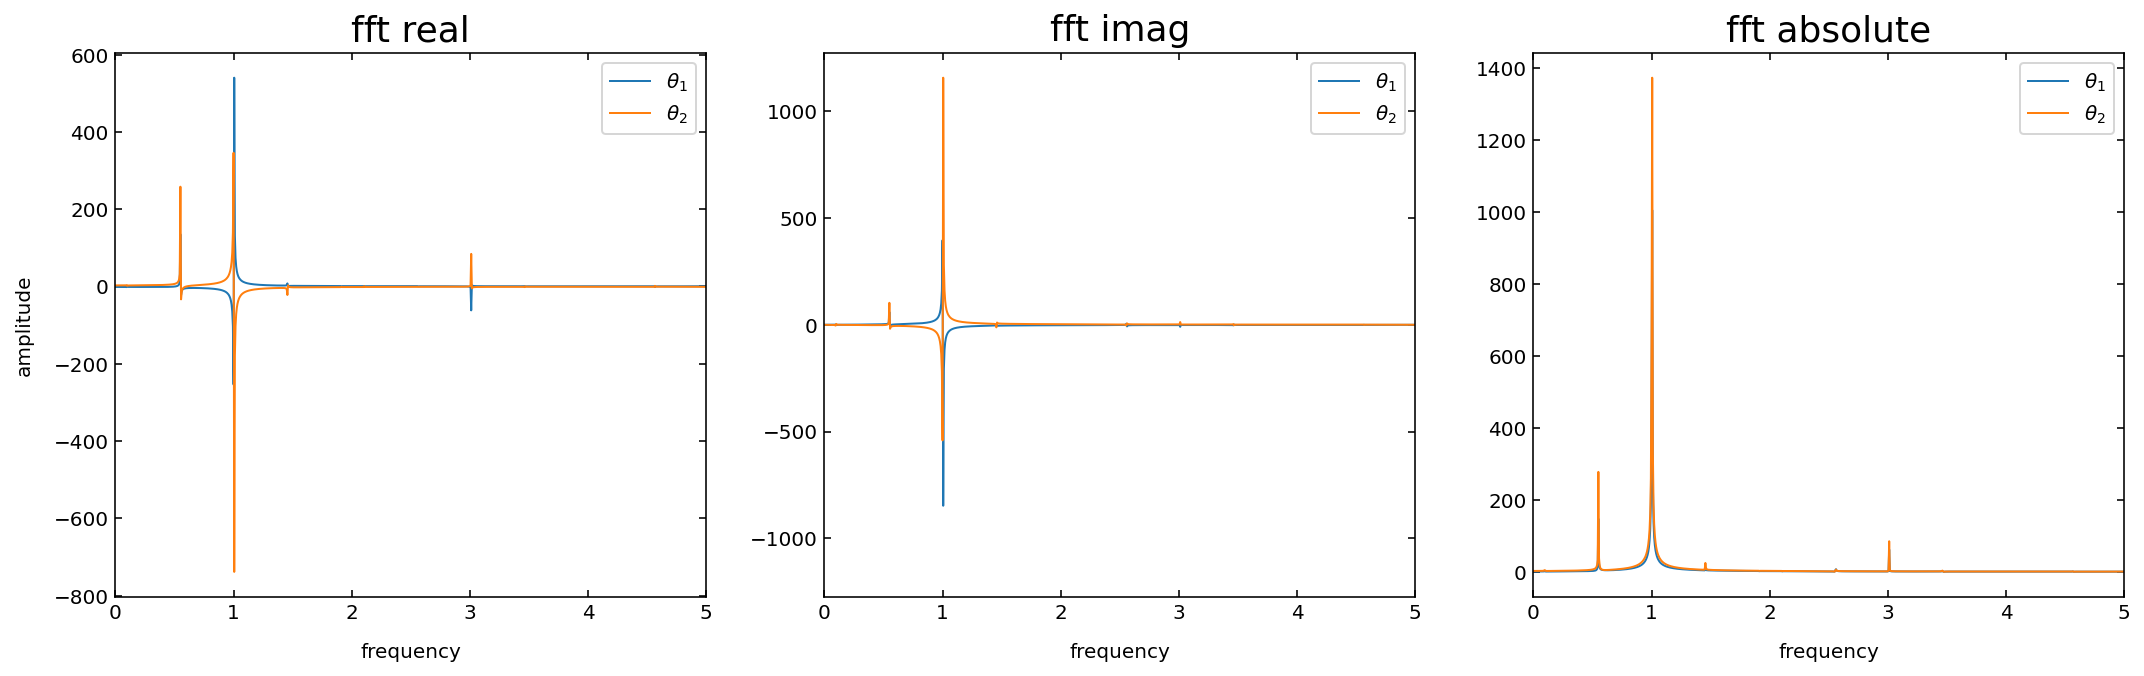

In [28]:
x = t
u1 = theta1_2
u2 = theta2_2

ft = fft.fft(u1)
ft = fftp.fftshift(ft)
dx = (max(x)-min(x))/len(x)
f = fft.fftfreq(len(x), dx)
f = fftp.fftshift(f)

ft2 = fft.fft(u2)
ft2 = fftp.fftshift(ft2)

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.plot(f, np.real(ft),label=r'$\theta_1$')
plt.plot(f, np.real(ft2),label=r'$\theta_2$')
plt.title('fft real')
plt.legend()
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.xlim(0, 5)

plt.subplot(1,3,2)
plt.plot(f, np.imag(ft),label=r'$\theta_1$')
plt.plot(f, np.imag(ft2),label=r'$\theta_2$')
plt.title('fft imag')
plt.legend()
plt.xlabel('frequency')
plt.xlim(0, 5)

plt.subplot(1,3,3)
plt.plot(f, np.abs(ft), label = r'$\theta_1$')
plt.plot(f, np.abs(ft2), label = r'$\theta_2$')
plt.xlabel('frequency')
plt.legend()
plt.title('fft absolute')
plt.xlim(0, 5)
plt.show()

### Finding the index of the peaks

In [29]:
def indexfinder(left,right,x):
    xrange_left=np.argwhere(left<x)[0][0]
    xrange_right=np.argwhere(right<x[xrange_left:])[0][0]
    xrange_right=xrange_left+xrange_right
    return([xrange_left,xrange_right])

def max_index(left,right,x,y):
    xrange_left=indexfinder(left,right,x)[0]
    xrange_right=indexfinder(left,right,x)[1]
    ynew=y[xrange_left:xrange_right]
    maximum=max(ynew)
    ang_max=np.argwhere(ynew==maximum)[0]
    return(xrange_left+ang_max)

In [30]:
max_ind1=max_index(0,0.8,f,ft)
max_ind2=max_index(0.8,1,f,ft)
max_ind3=max_index(1.3,2,f,ft)

theta1peaks=[f[max_ind1][0],f[max_ind2][0],f[max_ind3][0]]
print(theta1peaks)

[0.55, 0.8055555555555556, 1.4555555555555557]


### Plotting the decompositions separately

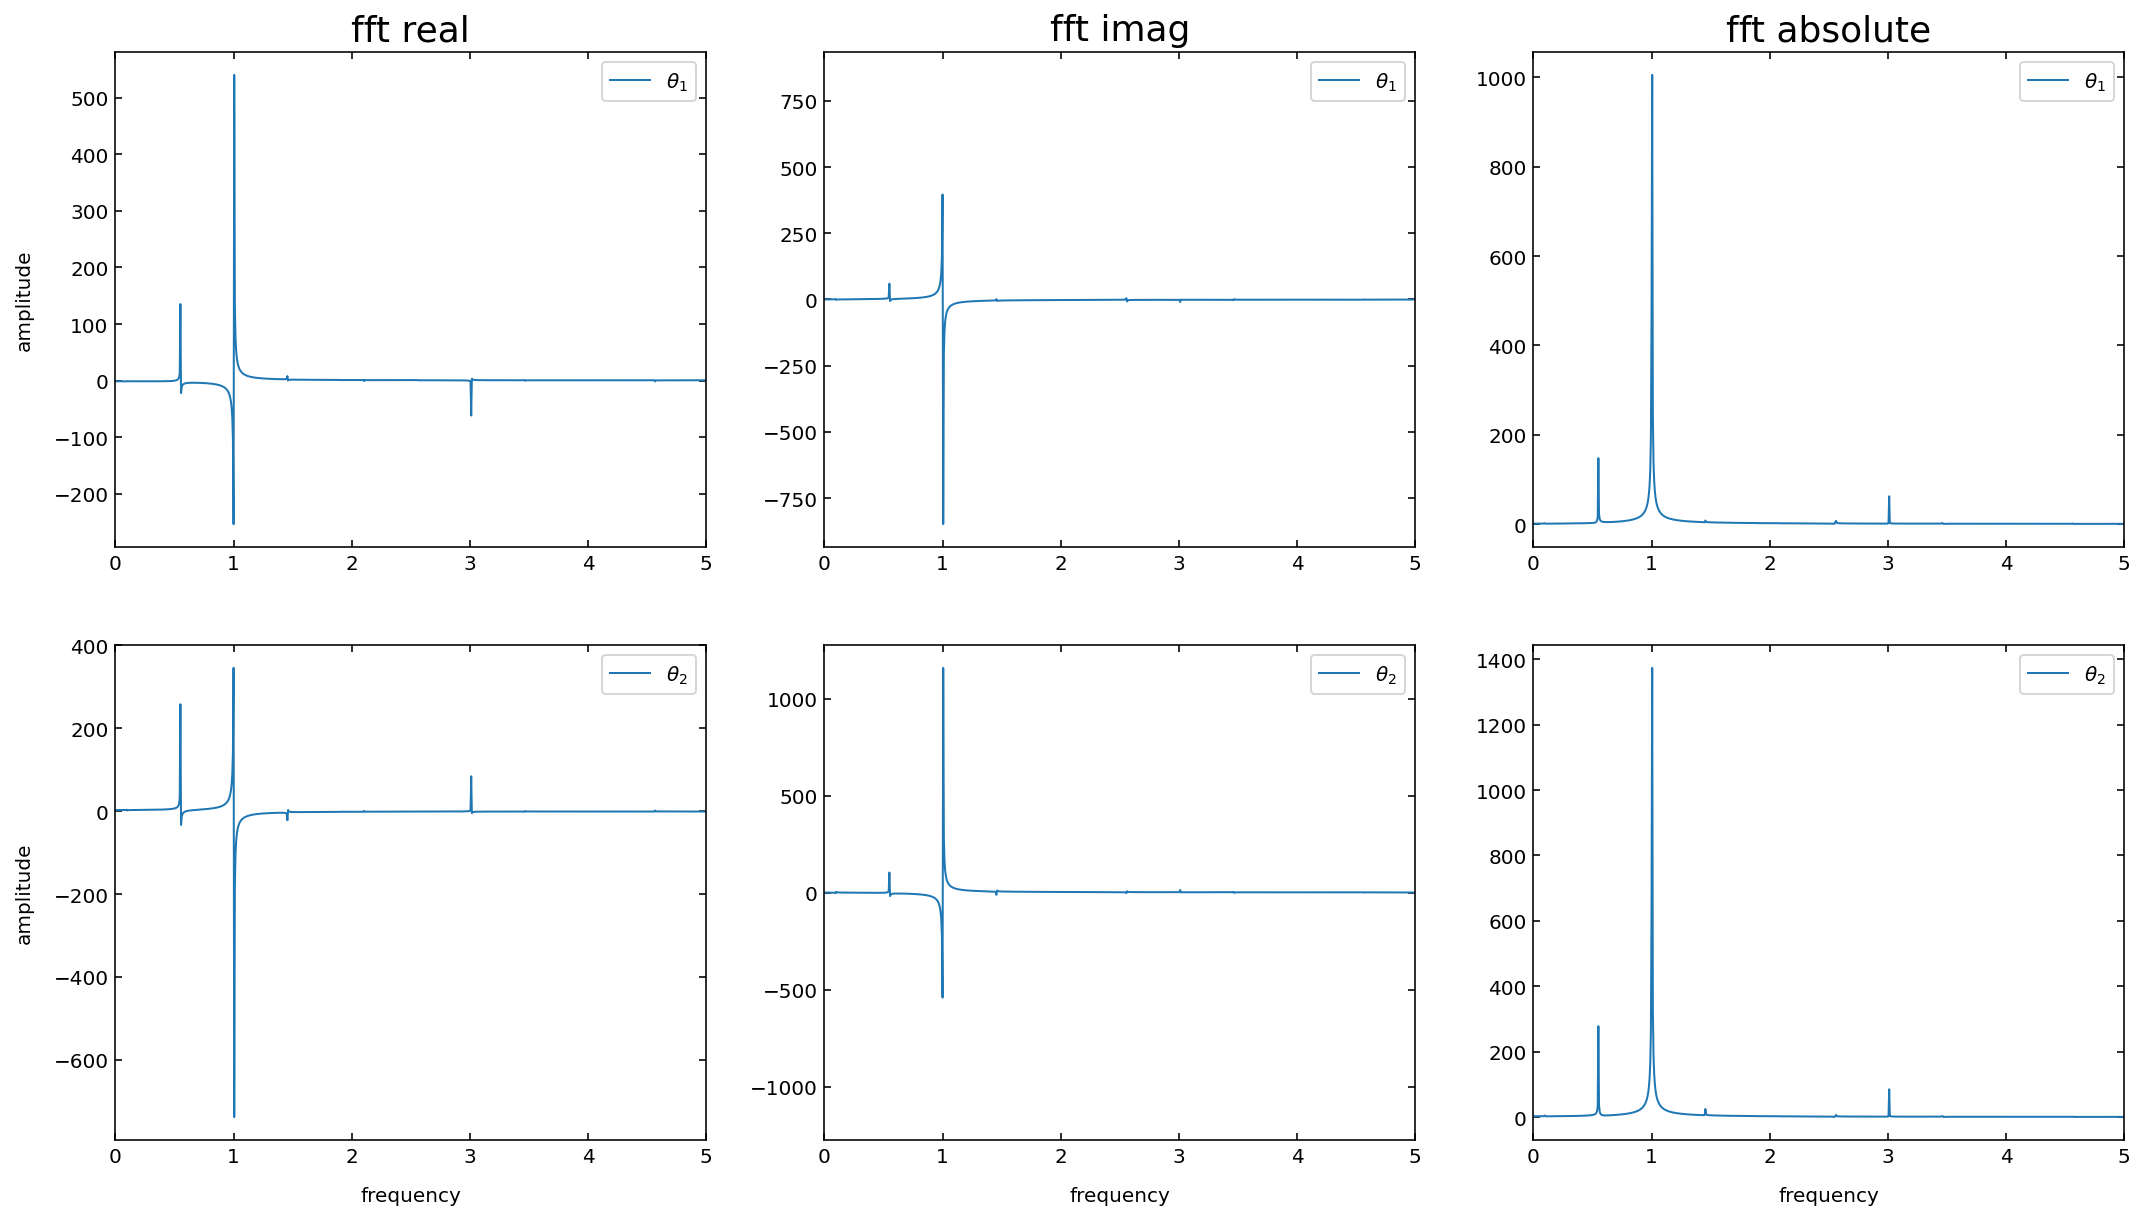

In [31]:
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
plt.plot(f, np.real(ft),label=r'$\theta_1$')
# plt.vlines(theta1peaks[2],-200,200,linewidth=0.5,linestyles='dashed')
plt.title('fft real')
plt.legend()
plt.ylabel('amplitude')
plt.xlim(0, 5)

plt.subplot(2,3,2)
plt.plot(f, np.imag(ft),label=r'$\theta_1$')
plt.title('fft imag')
plt.legend()
plt.xlim(0, 5)

plt.subplot(2,3,3)
plt.plot(f, np.abs(ft), label = r'$\theta_1$')
plt.legend()
plt.title('fft absolute')
plt.xlim(0, 5)

plt.subplot(2,3,4)
plt.plot(f, np.real(ft2),label=r'$\theta_2$')
plt.legend()
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.xlim(0, 5)

plt.subplot(2,3,5)
plt.plot(f, np.imag(ft2),label=r'$\theta_2$')
plt.legend()
plt.xlabel('frequency')
plt.xlim(0, 5)

plt.subplot(2,3,6)
plt.plot(f, np.abs(ft2), label = r'$\theta_2$')
plt.xlabel('frequency')
plt.legend()
plt.xlim(0, 5)
plt.show()

Jump to [table of contents](#TOC)

### Results (plots) <a id='beat-plots'></a>

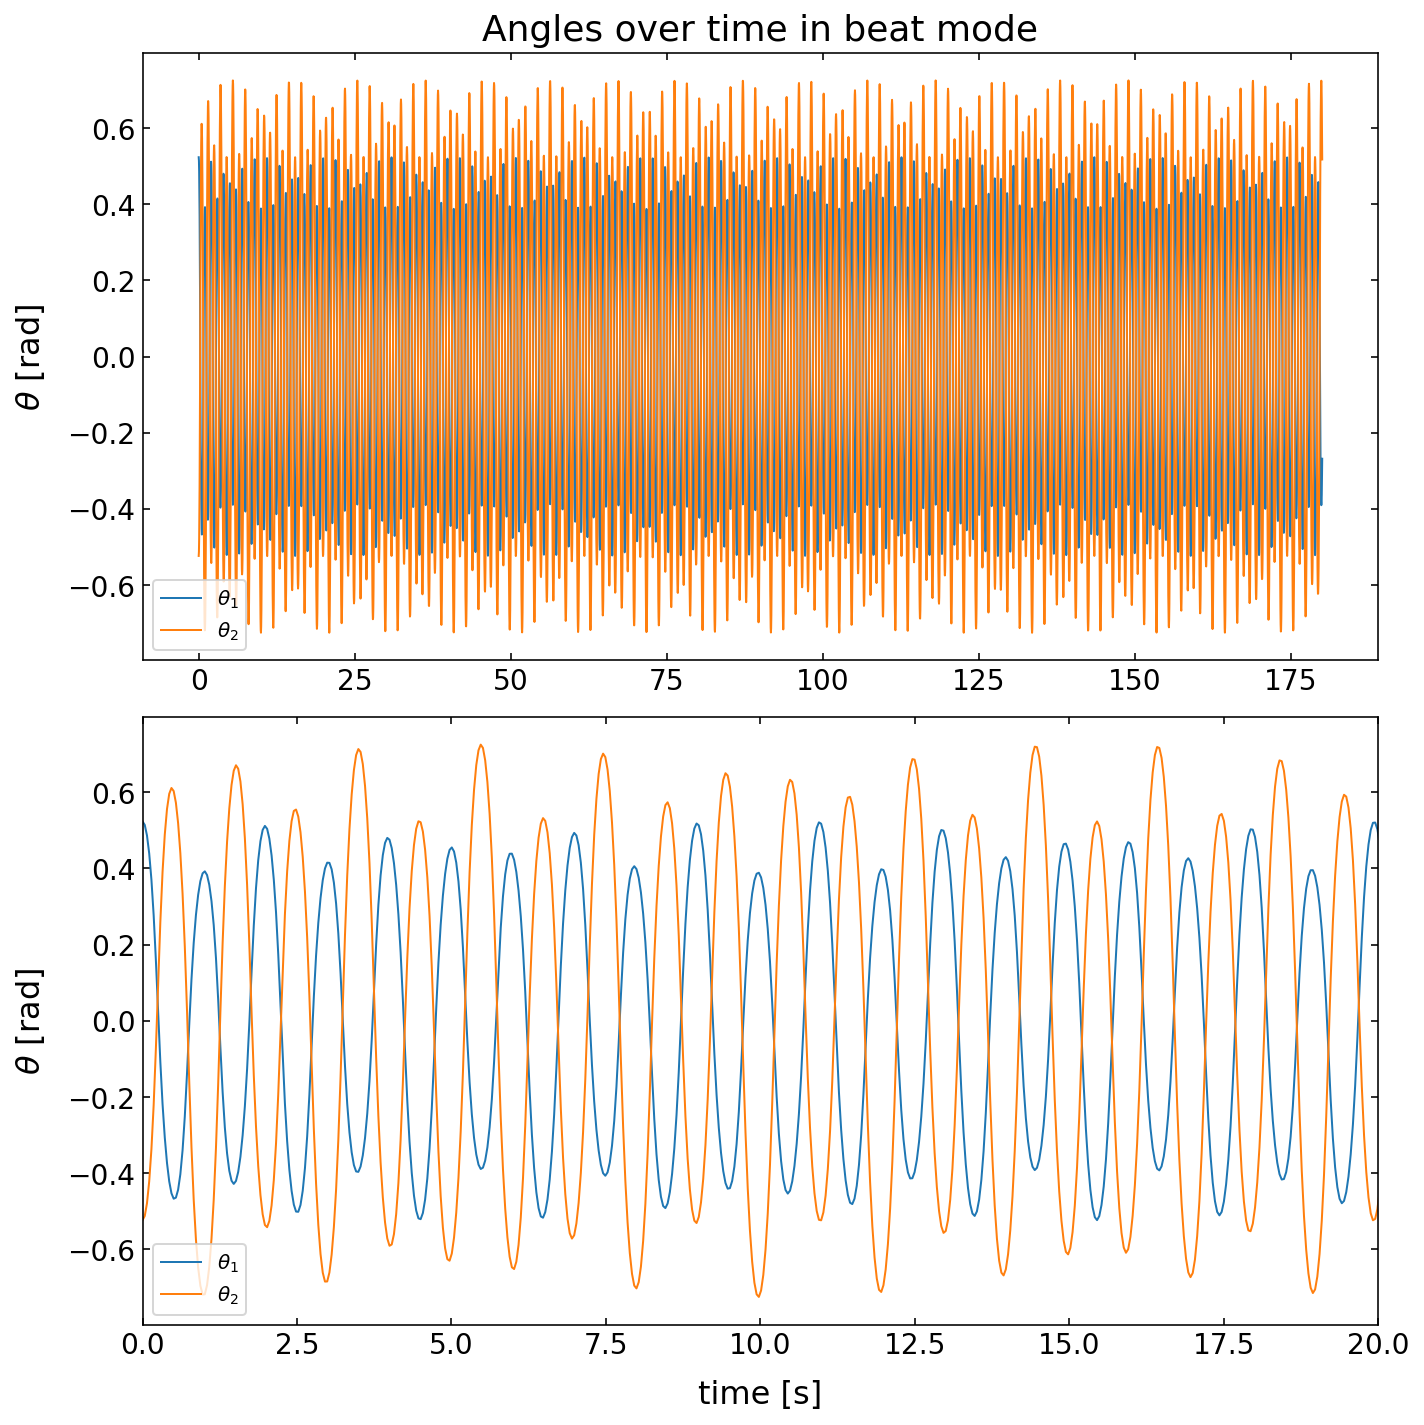

In [32]:
# Plotting angles over time
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.ylabel(r'$\theta$ [rad]',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,theta1_2,label=r'$\theta_1$')
plt.plot(t,theta2_2,label=r'$\theta_2$')
plt.title('Angles over time in beat mode')
plt.legend()

plt.subplot(2,1,2)
plt.xlabel('time [s]', fontsize=16)
plt.ylabel(r'$\theta$ [rad]',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,theta1_2,label=r'$\theta_1$')
plt.plot(t,theta2_2,label=r'$\theta_2$')
plt.legend()
plt.xlim(0,20)
plt.tight_layout()
plt.show()

### Phase space <a id='phase-space'></a>

Reference: [Wikipedia: Phase space](https://en.wikipedia.org/wiki/Phase_space)

In dynamical system theory, a phase space is a space in which all possible states of a system are represented, with each possible state corresponding to one unique point in the phase space. For mechanical systems, the phase space usually consists of all possible values of position and momentum variables.

In our case, the phase space consists of the angles and the angular velocities of the masses. Let us see how does the phase space of our double pendulum look like when it is in beat mode.

In [33]:
## setup the canvas for graph plotting
canvasg = Canvas(width=800, height=400, sync_image_data=False)

In [34]:
def theta1_2g(i):
    return theta1_2[:i]

def omega1_2g(i):
    return omega1_2[:i]

def theta2_2g(i):
    return theta2_2[:i]

def omega2_2g(i):
    return omega2_2[:i]

fig, ax = plt.subplots(1,1,figsize=(10,5))
plt.xlim(-0.9,0.9)
plt.ylim(-6,6)

plt.xlabel(r'$\theta$ [rad]',fontsize=16)
plt.ylabel(r'$\omega$ [rad/s]',fontsize=16)
plt.title(r'Angular velocities $\omega$ against angles $\theta$ in beat mode')
plt.tight_layout()

plt.draw()
background = fig.canvas.copy_from_bbox(ax.bbox)
points=ax.plot(theta1_2[0],omega1_2[0])[0]
points2=ax.plot(theta2_2[0],omega2_2[0])[0]
plt.close()

In [35]:
def drawg():
    for i in range(len(t)):
        fig.canvas.restore_region(background) ## restore the background we have saved before
        ax.draw_artist(points) ## draw the plot with the data points
        ax.draw_artist(points2)

        ## modify the data in the points object with the new coordinates
        points.set_data(theta1_2g(i),omega1_2g(i)) 
        points2.set_data(theta2_2g(i),omega2_2g(i))

        fig.canvas.blit(ax.bbox) ## copy everything into the figure canvasg

        ## obtain the image representing the plot as a color image with red, green, blue and alpha pixel values
        X = np.array(fig.canvas.renderer.buffer_rgba()) 

        with hold_canvas(canvasg): 
            canvasg.clear()
            canvasg.put_image_data(X)
            sleep(t[1]-t[0])

In [36]:
simulationg = Thread(target=drawg)  

In [37]:
print('Mass 1: inner trajectory; Mass 2: outer trajectory')
display(canvasg)
canvasg.flush()
simulationg.start() # starts animation

Mass 1: inner trajectory; Mass 2: outer trajectory


Canvas(height=400, width=800)

Jump to [table of contents](#TOC)

### Animation of beat mode <a id='animation-beat'></a>

In [38]:
## create our canvas2
canvas2 = Canvas(width=600, height=300)

In [39]:
scale=100 # scale meter to pixels, 1 meter = 100 pixels
off_x2=canvas2.width/6
off_y2=canvas2.height/2 

In [40]:
def draw2():
    for i in range(1,len(xdata1_2)):
        canvas2.line_width = 1
        canvas2.global_alpha = 1 # make them slightly transparent

        with hold_canvas(canvas2):
            canvas2.clear() # clear the canvas before drawing

            ## draw the two connections (1st double pendulum)
            canvas2.begin_path()          
            canvas2.move_to(off_x2, off_y2)
            canvas2.line_to(xdata1_2[i]*scale+off_x2, ydata1_2[i]*scale+off_y2)
            canvas2.move_to(xdata1_2[i]*scale+off_x2, ydata1_2[i]*scale+off_y2)
            canvas2.line_to(xdata2_2[i]*scale+off_x2, ydata2_2[i]*scale+off_y2)
            canvas2.stroke()

            ## draw the pivot point
            canvas2.fill_style = 'black' # fill color for pivot
            canvas2.fill_arc(off_x2, off_y2, 2, 0, 2*np.pi)

            ## draw the two masses
            canvas2.fill_style = 'red' # fill color for the 1st mass
            canvas2.fill_arc(xdata1_2[i]*scale+off_x2, ydata1_2[i]*scale+off_y2, 5, 0, 2*np.pi)
            canvas2.fill_style = 'blue' # fill color for the 2nd mass
            canvas2.fill_arc(xdata2_2[i]*scale+off_x2, ydata2_2[i]*scale+off_y2, 5, 0, 2*np.pi) 
            
            ## show the speed (1st pendulum)
            canvas2.begin_path()          
            canvas2.move_to(xdata1_2[i-1]*scale+3*off_x2, ydata1_2[i-1]*scale+off_y2)
            canvas2.line_to(xdata1_2[i]*scale+3*off_x2, ydata1_2[i]*scale+off_y2)
            canvas2.move_to(xdata2_2[i-1]*scale+3*off_x2, ydata2_2[i-1]*scale+off_y2)
            canvas2.line_to(xdata2_2[i]*scale+3*off_x2, ydata2_2[i]*scale+off_y2)
            canvas2.line_width=0.5
            canvas2.stroke()
            canvas2.fill_style = 'red' 
            canvas2.fill_arc(xdata1_2[i]*scale+3*off_x2, ydata1_2[i]*scale+off_y2, 2, 0, 2*np.pi)
            canvas2.fill_style = 'blue' 
            canvas2.fill_arc(xdata2_2[i]*scale+3*off_x2, ydata2_2[i]*scale+off_y2, 2, 0, 2*np.pi) 
            
            ## show the trajectory (1st pendulum)
            if i<30:
                j=i
                while j<30 and j!=0:
                    canvas2.begin_path()
                    canvas2.move_to(xdata1_2[j-1]*scale+5*off_x2, ydata1_2[j-1]*scale+off_y2)
                    canvas2.line_to(xdata1_2[j]*scale+5*off_x2, ydata1_2[j]*scale+off_y2)
                    canvas2.move_to(xdata2_2[j-1]*scale+5*off_x2, ydata2_2[j-1]*scale+off_y2)
                    canvas2.line_to(xdata2_2[j]*scale+5*off_x2, ydata2_2[j]*scale+off_y2)
                    canvas2.line_width=0.5
                    canvas2.stroke()
                    j=j-1
                canvas2.fill_style = 'red' 
                canvas2.fill_arc(xdata1_2[i]*scale+5*off_x2, ydata1_2[i]*scale+off_y2, 2, 0, 2*np.pi)
                canvas2.fill_style = 'blue' 
                canvas2.fill_arc(xdata2_2[i]*scale+5*off_x2, ydata2_2[i]*scale+off_y2, 2, 0, 2*np.pi)
            else:
                j=i
                while j>(i-30):
                    canvas2.begin_path()          
                    canvas2.move_to(xdata1_2[j-1]*scale+5*off_x2, ydata1_2[j-1]*scale+off_y2)
                    canvas2.line_to(xdata1_2[j]*scale+5*off_x2, ydata1_2[j]*scale+off_y2)
                    canvas2.move_to(xdata2_2[j-1]*scale+5*off_x2, ydata2_2[j-1]*scale+off_y2)
                    canvas2.line_to(xdata2_2[j]*scale+5*off_x2, ydata2_2[j]*scale+off_y2)
                    canvas2.line_width=0.5
                    canvas2.stroke()
                    j=j-1
                canvas2.fill_style = 'red' 
                canvas2.fill_arc(xdata1_2[i]*scale+5*off_x2, ydata1_2[i]*scale+off_y2, 2, 0, 2*np.pi)
                canvas2.fill_style = 'blue' 
                canvas2.fill_arc(xdata2_2[i]*scale+5*off_x2, ydata2_2[i]*scale+off_y2, 2, 0, 2*np.pi)
                
            ## sleep a timestep after drawing
            sleep(t[1]-t[0]) 

In [41]:
simulation2 = Thread(target=draw2)  

In [42]:
display(canvas2)
canvas2.flush()
simulation2.start() 

Canvas(height=300, width=600)

Jump to [table of contents](#TOC)

## Butterfly effect <a id='butterfly'></a>

In chaos theory, the butterfly effect is the sensitive dependence on initial conditions in which a small change in one state of a deterministic nonlinear system can result in large differences in a later state. 

Here, the (default) values of the initial conditions of 2 double pendula are set to have a very minute difference. And later we will see in the animation that their motions are indistinguisable initially but diverges after some time. The rate or the time taken for the divergence or separation to be significant can be characterized by the so-called [Lyapunov exponent](https://en.wikipedia.org/wiki/Lyapunov_exponent).

In [43]:
## Reassign the system's parameters

m1=3
m2=4
l1=0.5
l2=1.0
g=9.81

In [44]:
# inital angles, initial angular velocities of the second double pendulum

difference=1e-5                     # the minute difference in initial conditions
ini3_theta1=ini_theta1+difference   # initial angle for mass 1 of the second double pendulum
ini3_theta2=ini_theta2              # initial angle for mass 2 of the second pendulum
ini3_dottheta1=ini_dottheta1        # initial angular velocity for mass 1 of the second pendulum
ini3_dottheta2=ini_dottheta2        # initial angular velocity for mass 2 of the second pendulum

state3=np.array([ini3_theta1,ini3_dottheta1,ini3_theta2,ini3_dottheta2])

In [45]:
# solve the differential equations for the second double pendulum
answer3=odeint(double_pendulum,state3,t)

# angles 
theta1_3=answer3[:,0]
theta2_3=answer3[:,2]

# angular velocities
omega1_3=answer3[:,1]
omega2_3=answer3[:,3]

# coordinates of the two masses
xdata1_3=l1*np.sin(theta1_3)
ydata1_3=l1*np.cos(theta1_3)
xdata2_3=l2*np.sin(theta2_3)+xdata1_3
ydata2_3=l2*np.cos(theta2_3)+ydata1_3

Jump to [table of contents](#TOC)

### Results (plots) <a id='Results-butterfly'></a>

Let us see and compare how the two double pendula with slightly different initial conditions evolve over time. 

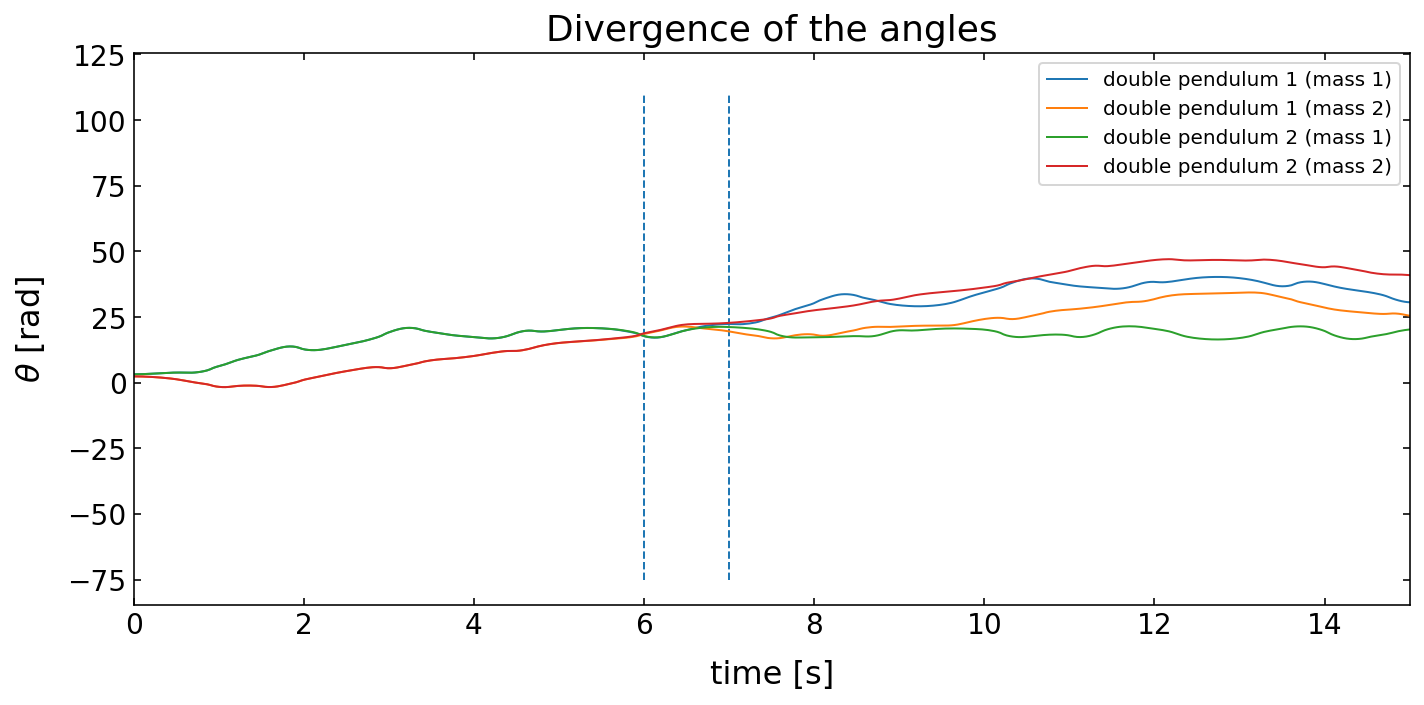

Significant divergence starts in the range between the 2 dashed lines (for default initial conditions).


In [46]:
# Plotting angles over time
plt.figure(figsize=(10,5))
plt.xlabel('time [s]', fontsize=16)
plt.ylabel(r'$\theta$ [rad]',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,theta1,label='double pendulum 1 (mass 1)')
plt.plot(t,theta2,label='double pendulum 1 (mass 2)')
plt.plot(t,theta1_3,label='double pendulum 2 (mass 1)')
plt.plot(t,theta2_3,label='double pendulum 2 (mass 2)')
plt.vlines(6,-75,110,linestyles='dashed')
plt.vlines(7,-75,110,linestyles='dashed')
plt.legend()
plt.title('Divergence of the angles')
plt.tight_layout()  
plt.xlim(0,15)
plt.show()

print('Significant divergence starts in the range between the 2 dashed lines (for default initial conditions).')

### Animation of the 2 double pendula <a id='animation-butterfly'></a>

Let us see and compare how the two double pendula with slightly different initial conditions evolve over time. 

In [47]:
## create our canvas
canvas4 = Canvas(width=920, height=300)

In [48]:
scale=100 
off_x4=canvas4.width/6
off_y4=canvas4.height/2 

In [49]:
def draw4():
    for i in range(1,len(xdata1)):
        canvas4.line_width = 1
        canvas4.global_alpha = 1 # make them slightly transparent

        with hold_canvas(canvas4):
            canvas4.clear() # clear the canvas before drawing

            ## draw the two connections (1st double pendulum)
            canvas4.begin_path()          
            canvas4.move_to(off_x4, off_y4)
            canvas4.line_to(xdata1[i]*scale+off_x4, ydata1[i]*scale+off_y4)
            canvas4.move_to(xdata1[i]*scale+off_x4, ydata1[i]*scale+off_y4)
            canvas4.line_to(xdata2[i]*scale+off_x4, ydata2[i]*scale+off_y4)
            canvas4.stroke()

            ## draw the pivot point
            canvas4.fill_style = 'black' # fill color for pivot
            canvas4.fill_arc(off_x4, off_y4, 2, 0, 2*np.pi)

            ## draw the two masses
            canvas4.fill_style = 'red' # fill color for the 1st mass
            canvas4.fill_arc(xdata1[i]*scale+off_x4, ydata1[i]*scale+off_y4, 5, 0, 2*np.pi)
            canvas4.fill_style = 'blue' # fill color for the 2nd mass
            canvas4.fill_arc(xdata2[i]*scale+off_x4, ydata2[i]*scale+off_y4, 5, 0, 2*np.pi) 

            ## draw the two connections (2nd double pendulum)
            canvas4.begin_path()          
            canvas4.move_to(off_x4, off_y4)
            canvas4.line_to(xdata1_3[i]*scale+off_x4, ydata1_3[i]*scale+off_y4)
            canvas4.move_to(xdata1_3[i]*scale+off_x4, ydata1_3[i]*scale+off_y4)
            canvas4.line_to(xdata2_3[i]*scale+off_x4, ydata2_3[i]*scale+off_y4)
            canvas4.stroke()

            ## draw the two masses
            canvas4.fill_style = 'orange' # fill color for the 1st particle
            canvas4.fill_arc(xdata1_3[i]*scale+off_x4, ydata1_3[i]*scale+off_y4, 5, 0, 2*np.pi)
            canvas4.fill_style = 'green' # fill color for the 2nd particle
            canvas4.fill_arc(xdata2_3[i]*scale+off_x4, ydata2_3[i]*scale+off_y4, 5, 0, 2*np.pi)

            ## show the speed (1st pendulum)
            canvas4.begin_path()          
            canvas4.move_to(xdata1[i-1]*scale+3*off_x4, ydata1[i-1]*scale+off_y4)
            canvas4.line_to(xdata1[i]*scale+3*off_x4, ydata1[i]*scale+off_y4)
            canvas4.move_to(xdata2[i-1]*scale+3*off_x4, ydata2[i-1]*scale+off_y4)
            canvas4.line_to(xdata2[i]*scale+3*off_x4, ydata2[i]*scale+off_y4)
            canvas4.line_width=0.5
            canvas4.stroke()
            canvas4.fill_style = 'red' 
            canvas4.fill_arc(xdata1[i]*scale+3*off_x4, ydata1[i]*scale+off_y4, 2, 0, 2*np.pi)
            canvas4.fill_style = 'blue' 
            canvas4.fill_arc(xdata2[i]*scale+3*off_x4, ydata2[i]*scale+off_y4, 2, 0, 2*np.pi) 

            ## show the speed (2nd pendulum)
            canvas4.begin_path()          
            canvas4.move_to(xdata1_3[i-1]*scale+3*off_x4, ydata1_3[i-1]*scale+off_y4)
            canvas4.line_to(xdata1_3[i]*scale+3*off_x4, ydata1_3[i]*scale+off_y4)
            canvas4.move_to(xdata2_3[i-1]*scale+3*off_x4, ydata2_3[i-1]*scale+off_y4)
            canvas4.line_to(xdata2_3[i]*scale+3*off_x4, ydata2_3[i]*scale+off_y4)
            canvas4.line_width=0.5
            canvas4.stroke()
            canvas4.fill_style = 'orange' 
            canvas4.fill_arc(xdata1_3[i]*scale+3*off_x4, ydata1_3[i]*scale+off_y4, 2, 0, 2*np.pi)
            canvas4.fill_style = 'green' 
            canvas4.fill_arc(xdata2_3[i]*scale+3*off_x4, ydata2_3[i]*scale+off_y4, 2, 0, 2*np.pi)
            
            ## show the trajectory (1st pendulum)
            if i<30:
                j=i
                while j<30 and j!=0:
                    canvas4.begin_path()
                    canvas4.move_to(xdata1[j-1]*scale+5*off_x4, ydata1[j-1]*scale+off_y4)
                    canvas4.line_to(xdata1[j]*scale+5*off_x4, ydata1[j]*scale+off_y4)
                    canvas4.move_to(xdata2[j-1]*scale+5*off_x4, ydata2[j-1]*scale+off_y4)
                    canvas4.line_to(xdata2[j]*scale+5*off_x4, ydata2[j]*scale+off_y4)
                    canvas4.line_width=0.5
                    canvas4.stroke()
                    j=j-1
                canvas4.fill_style = 'red' 
                canvas4.fill_arc(xdata1[i]*scale+5*off_x4, ydata1[i]*scale+off_y4, 2, 0, 2*np.pi)
                canvas4.fill_style = 'blue' 
                canvas4.fill_arc(xdata2[i]*scale+5*off_x4, ydata2[i]*scale+off_y4, 2, 0, 2*np.pi)
            else:
                j=i
                while j>(i-30):
                    canvas4.begin_path()          
                    canvas4.move_to(xdata1[j-1]*scale+5*off_x4, ydata1[j-1]*scale+off_y4)
                    canvas4.line_to(xdata1[j]*scale+5*off_x4, ydata1[j]*scale+off_y4)
                    canvas4.move_to(xdata2[j-1]*scale+5*off_x4, ydata2[j-1]*scale+off_y4)
                    canvas4.line_to(xdata2[j]*scale+5*off_x4, ydata2[j]*scale+off_y4)
                    canvas4.line_width=0.5
                    canvas4.stroke()
                    j=j-1
                canvas4.fill_style = 'red' 
                canvas4.fill_arc(xdata1[i]*scale+5*off_x4, ydata1[i]*scale+off_y4, 2, 0, 2*np.pi)
                canvas4.fill_style = 'blue' 
                canvas4.fill_arc(xdata2[i]*scale+5*off_x4, ydata2[i]*scale+off_y4, 2, 0, 2*np.pi)
            
            ## show the trajectory (2nd pendulum)
            if i<30:
                j=i
                while j<30 and j!=0:
                    canvas4.begin_path()          
                    canvas4.move_to(xdata1_3[j-1]*scale+5*off_x4, ydata1_3[j-1]*scale+off_y4)
                    canvas4.line_to(xdata1_3[j]*scale+5*off_x4, ydata1_3[j]*scale+off_y4)
                    canvas4.move_to(xdata2_3[j-1]*scale+5*off_x4, ydata2_3[j-1]*scale+off_y4)
                    canvas4.line_to(xdata2_3[j]*scale+5*off_x4, ydata2_3[j]*scale+off_y4)
                    canvas4.line_width=0.5
                    canvas4.stroke()
                    j=j-1
                canvas4.fill_style = 'red' 
                canvas4.fill_arc(xdata1_3[i]*scale+5*off_x4, ydata1_3[i]*scale+off_y4, 2, 0, 2*np.pi)
                canvas4.fill_style = 'blue' 
                canvas4.fill_arc(xdata2_3[i]*scale+5*off_x4, ydata2_3[i]*scale+off_y4, 2, 0, 2*np.pi)
            else:
                j=i
                while j>(i-30):
                    canvas4.begin_path()          
                    canvas4.move_to(xdata1_3[j-1]*scale+5*off_x4, ydata1_3[j-1]*scale+off_y4)
                    canvas4.line_to(xdata1_3[j]*scale+5*off_x4, ydata1_3[j]*scale+off_y4)
                    canvas4.move_to(xdata2_3[j-1]*scale+5*off_x4, ydata2_3[j-1]*scale+off_y4)
                    canvas4.line_to(xdata2_3[j]*scale+5*off_x4, ydata2_3[j]*scale+off_y4)
                    canvas4.line_width=0.5
                    canvas4.stroke()
                    j=j-1
                canvas4.fill_style = 'orange' 
                canvas4.fill_arc(xdata1_3[i]*scale+5*off_x4, ydata1_3[i]*scale+off_y4, 2, 0, 2*np.pi)
                canvas4.fill_style = 'green' 
                canvas4.fill_arc(xdata2_3[i]*scale+5*off_x4, ydata2_3[i]*scale+off_y4, 2, 0, 2*np.pi)
                
            ## sleep a timestep after drawing
            sleep(t[1]-t[0]) 

In [50]:
simulation4 = Thread(target=draw4)  

In [51]:
display(canvas4)
canvas4.flush()
simulation4.start() 

Canvas(height=300, width=920)

Jump to [table of contents](#TOC)

### Observation 3 <a id='observation3'></a>

We can either see from the graph or the animation that although the trajectory of the masses are initially indistinguisable for the 2 double pendula, they later take totally different paths. This demonstrate the sensitivity of a chaotic system to its initial conditions. Again, this can be summarized by a sentence from Edward Lorenz that we mentioned earlier:

> When the present determines the future, but the approximate present does not approximately determine the future

## Stability <a id='stability'></a>

In contrast to the butterfly effect, we would like to know whether there exist modes where tiny difference does not result in totally different trajectories. We have already seen that some initial conditions lead to periodic motions in the [beat mode](#beat-modes) section. Therefore, it is natural to think maybe they are stable to minute changes in initial condition. Let us check whether it is really so with the cells below.

In [52]:
## Fixing the second double pendulum's parameters

m1=4
m2=4
l1=0.5
l2=0.5
g=9.81

In [53]:
# inital angles, initial angular velocities for the second double pendulum

difference2=1e-5
ini4_theta1=ini2_theta1+difference2   # initial angle for mass 1
ini4_theta2=ini2_theta2               # initial angle for mass 2
ini4_dottheta1=ini2_dottheta1         # initial angular velocity for mass 1
ini4_dottheta2=ini2_dottheta2         # initial angular velocity for mass 2

state4=np.array([ini4_theta1,ini4_dottheta1,ini4_theta2,ini4_dottheta2])

In [54]:
#solve the differential equations for the second double pendulum

answer4=odeint(double_pendulum,state4,t)

# angles 
theta1_4=answer4[:,0]
theta2_4=answer4[:,2]

# angular velocities
omega1_4=answer4[:,1]
omega2_4=answer4[:,3]

#coordinates of the two masses
xdata1_4=l1*np.sin(theta1_4)
ydata1_4=l1*np.cos(theta1_4)
xdata2_4=l2*np.sin(theta2_4)+xdata1_4
ydata2_4=l2*np.cos(theta2_4)+ydata1_4

Jump to [table of contents](#TOC)

### Results (plots) <a id='beat-compare'></a>

Let us see and compare how the two double pendula with slightly different initial conditions evolve over time when in beat mode.

To compare the overview of the patterns.


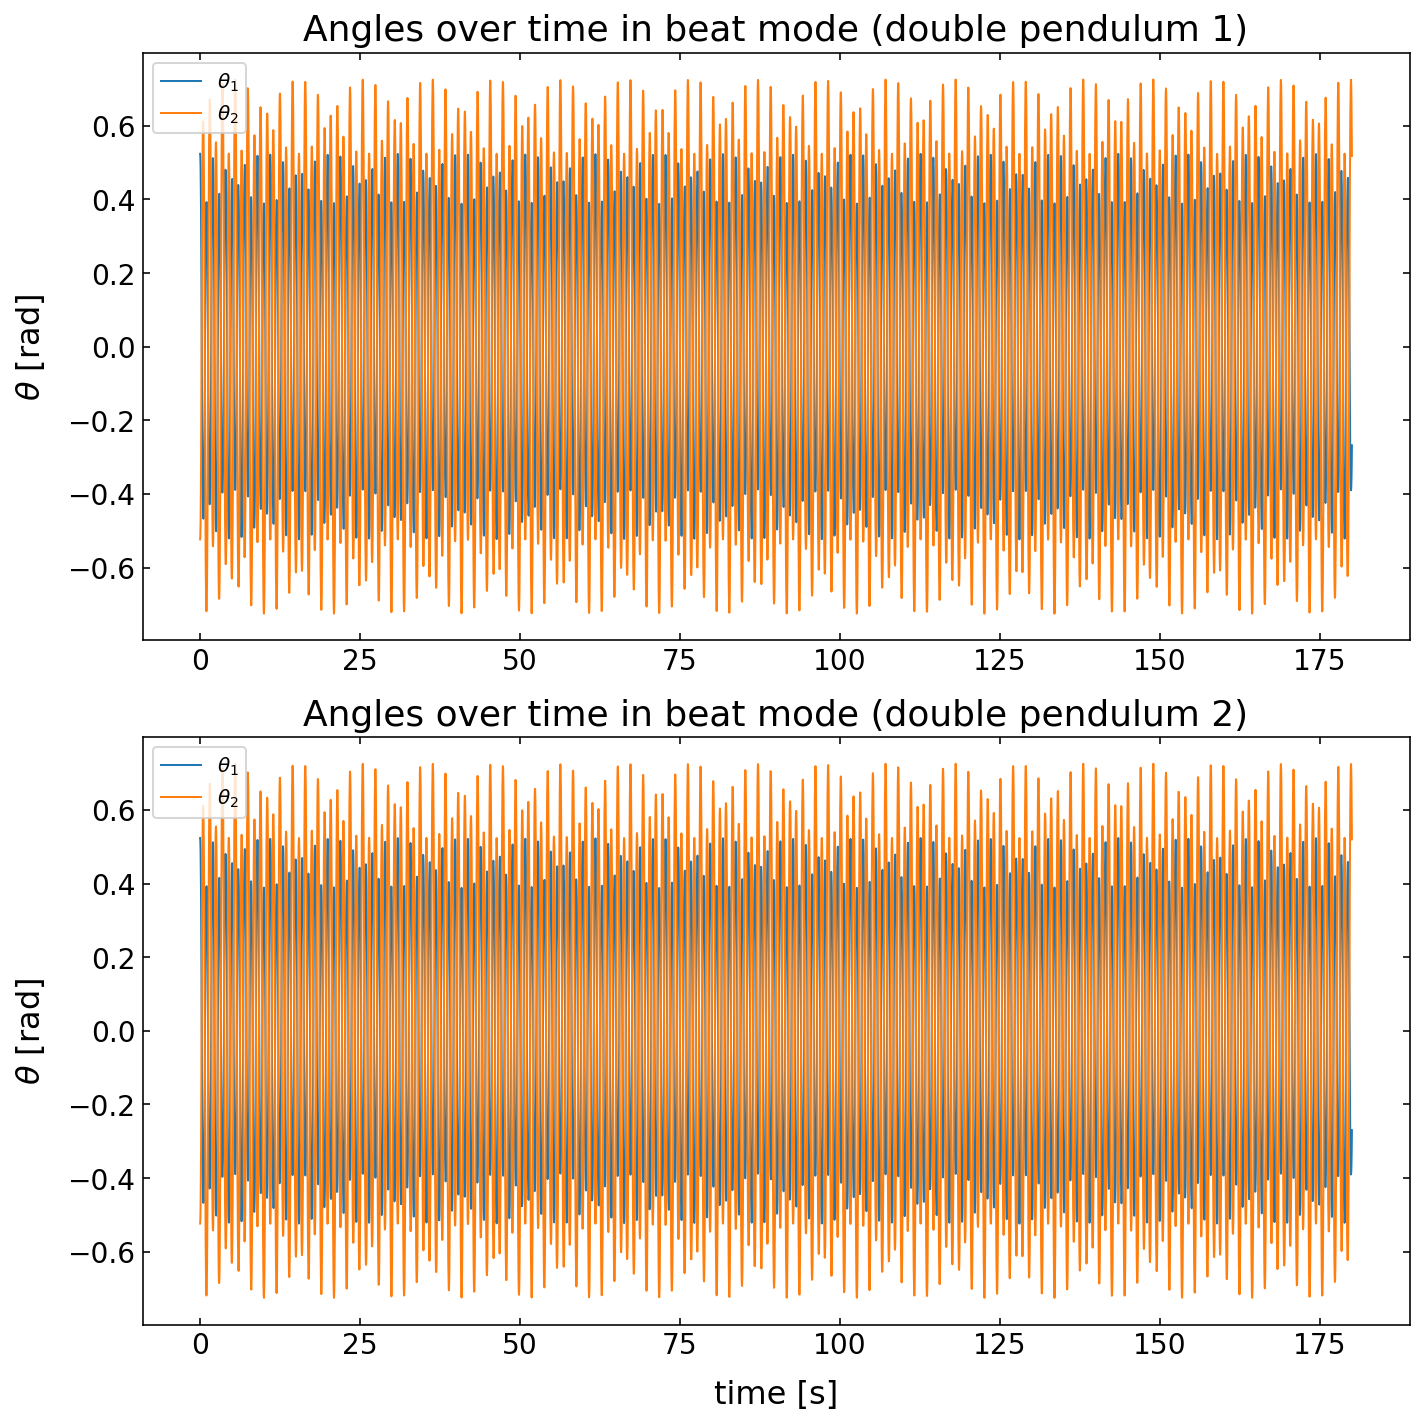

In [55]:
# Plotting angles over time

print('To compare the overview of the patterns.')
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.ylabel(r'$\theta$ [rad]',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,theta1_2,label=r'$\theta_1$')
plt.plot(t,theta2_2,label=r'$\theta_2$')
plt.title('Angles over time in beat mode (double pendulum 1)')
plt.legend()

plt.subplot(2,1,2)
plt.xlabel('time [s]', fontsize=16)
plt.ylabel(r'$\theta$ [rad]',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,theta1_4,label=r'$\theta_1$')
plt.plot(t,theta2_4,label=r'$\theta_2$')
plt.title('Angles over time in beat mode (double pendulum 2)')
plt.legend()
plt.tight_layout()
plt.show()

To zoom in and compare the time evolution of the angles of the 2 double pendula.


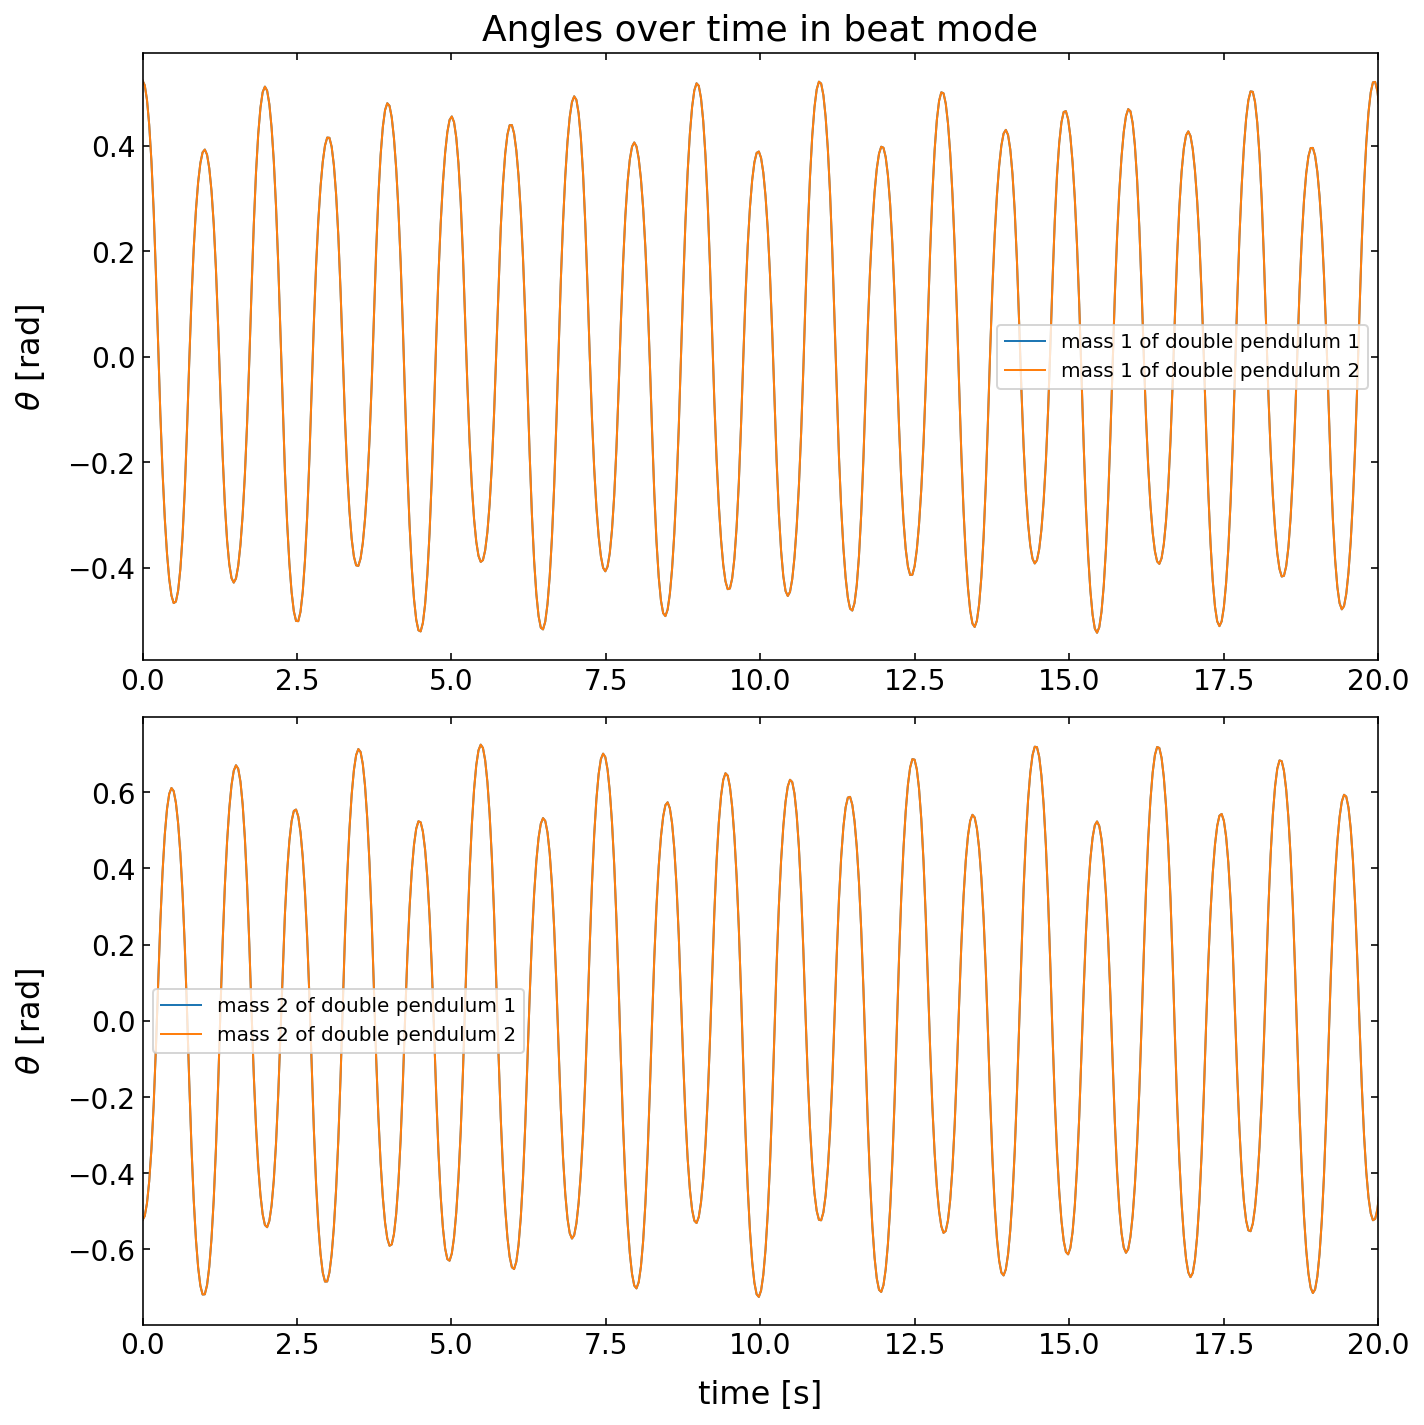

In [56]:
# Plotting angles over time

print('To zoom in and compare the time evolution of the angles of the 2 double pendula.')
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.ylabel(r'$\theta$ [rad]',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,theta1_2,label='mass 1 of double pendulum 1')
plt.plot(t,theta1_4,label='mass 1 of double pendulum 2')
plt.title('Angles over time in beat mode')
plt.legend()
plt.xlim(0,20)

plt.subplot(2,1,2)
plt.xlabel('time [s]', fontsize=16)
plt.ylabel(r'$\theta$ [rad]',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,theta2_2,label='mass 2 of double pendulum 1')
plt.plot(t,theta2_4,label='mass 2 of double pendulum 2')
plt.legend()
plt.xlim(0,20)
plt.tight_layout()
plt.show()

### Observation 4 <a id='observation4'></a>

There is no visible difference between the motions of the two double pendula. Like what we have guessed, the system is stable to minute changes in initial conditions when the motion is not chaotic.

Jump to [table of contents](#TOC)

## Summary <a id='summary'></a>

Returning to the [motivation and aims](#aim) of this project, at this point, we have: 

1. simulated the dynamics of a double pendulum 
2. demonstrated the emergence of chaos from a fully deterministic system. 
3. seen that there exist modes where the system is periodic and stable to minute changes in initial conditions. 
4. demonstrated the famous hallmark of a chaotic system: the butterfly effect.

## Appendix<a id='appendix'></a>

A more detailed and step-by-step derivation of the [equations of motion](#eom) is given here.

### Defining the problem

<div align="right">Fig.1 <a id='figure1'></a>Schematic diagram of double pendulum</div>
<img src="setup.png" height="25%" width="25%" align="right" alt="Schematic diagram of double pendulum" title="double pendulum"/>

We have to first find the equations of motion describing the system. It is not so easy to do so if we start directly in Newton's way, which is to think in terms of all the forces acting on the particles. A better approach is to use Lagrange mechanics.

The algorithm that I employed while using Lagrange mechanics is:

1. Formulate the constraints.(Constraints are conditions which limit the free motion of the particles of a physical system)
2. Choose proper generalized coordinates $\mathbf{q}$.
3. Find the transformation formulas.
4. Write down the Lagrangian function $L$.
5. Derive and solve the Lagrange equation.

**Note:**  
1. For simplicity, I have ignored any dissipative forces, e.g. friction, and also further assumed massless rods.

Jump to [Defining the problem](#define)

#### Constraints <a id='append-constraints'></a>

There are altogether four holonomic constraints for a planar double pendulum:

\begin{gather}
    z_1=z_2=\text{const}=0\\
    x_1^2+y_1^2=l_1^2\\
    (x_2-x_1)^2+(y_2-y_1)^2=l_2^2
\end{gather}

Holonomic constraints are constraints that can be written in the following form:

\begin{gather}
    f_{\nu}(\mathbf{r}_1,\mathbf{r}_2,\mathbf{r}_3,...,\mathbf{r}_n,t)=0\hspace{0.5in}\nu=1,2,...,p
\end{gather}

Hence the number of degrees of freedom ($3N$ for $N$ free particles) amounts to:

$$S=6-4=2$$

Jump to [table of contents](#TOC) or [constraints](#constraints)

#### Generalized coordinate and transformation formulas <a id='append-coordinate'></a>

Convenient generalized coordinates are:

\begin{gather}
    q_1=\theta_1 \hspace{0.5in} q_2=\theta_2
\end{gather}

The transformation formulas:

\begin{gather}
    x_1=l_1\sin{\theta_1}\hspace{0.25in}y_1=-l_1\cos{\theta_1}\hspace{0.25in}z_1=0\\
    x_2=l_2\sin{\theta_2}+x_1\hspace{0.25in}y_2=-l_2\cos{\theta_2}+y_1\hspace{0.25in}z_2=0
\end{gather}

Jump to [Generalized coordinate and transformation formulas](#coordinate)

#### Lagrangian, $L$ <a id='append-lagrangian'></a>

The Lagrangian $L=T-V$, where $T$ is the total kinetic energy, $V$ is the total potential energy. The kinetic energy is:

\begin{gather}
    T=\frac{1}{2}m_1(\dot{x}_1^2+\dot{y}_1^2)+\frac{1}{2}m_2(\dot{x}_2^2+\dot{y}_2^2)
\end{gather}

\begin{gather}
\dot{x}_1=l_1\cos{\theta_1}\dot{\theta}_1\hspace{0.25in}\dot{y}_1=l_1\sin{\theta_1}\dot{\theta}_1\\ \dot{x}_2=l_2\cos{\theta_2}\dot{\theta}_2+l_1\cos{\theta_1}\dot{\theta}_1\hspace{0.25in}\dot{y}_2=l_2\sin{\theta_2}\dot{\theta}_2+l_1\sin{\theta_1}\dot{\theta}_1
\end{gather}

\begin{gather}
\begin{split}
\dot{x}_2^2&=(l_2\cos{\theta_2}\dot{\theta}_2+l_1\cos{\theta_1}\dot{\theta}_1)^2\\ &=l_2^2\cos^2{\theta_2}\dot{\theta}_2^2+l_1^2\cos^2{\theta_1}\dot{\theta}_1^2+2l_1l_2\cos{\theta_1}\cos{\theta_2}\dot{\theta}_1\dot{\theta}_2
\end{split}
\end{gather}

\begin{gather}
\begin{split}
\dot{y}_2&=(l_2\sin{\theta_2}\dot{\theta}_2+l_1\sin{\theta_1}\dot{\theta}_1)^2\\ &=l_2^2\sin^2{\theta_2}\dot{\theta}_2^2+l_1^2\sin^2{\theta_1}\dot{\theta}_1^2+2l_1l_2\sin{\theta_1}\sin{\theta_2}\dot{\theta}_1\dot{\theta}_2
\end{split}
\end{gather}

Therefore

\begin{gather}
\begin{split}
T=&\frac{1}{2}m_1(l_1^2\cos^2{\theta_1}\dot{\theta}_1^2+l_1^2\sin^2{\theta_1}\dot{\theta}_1^2)\\
&+\frac{1}{2}m_2(l_2^2\cos^2{\theta_2}\dot{\theta}_2^2+l_1^2\cos^2{\theta_1}\dot{\theta}_1^2+2l_1l_2\cos{\theta_1}\cos{\theta_2}\dot{\theta}_1\dot{\theta}_2\\ &+l_2^2\sin^2{\theta_2}\dot{\theta}_2^2+l_1^2\sin^2{\theta_1}\dot{\theta}_1^2+2l_1l_2\sin{\theta_1}\sin{\theta_2}\dot{\theta}_1\dot{\theta}_2)\\
=&\frac{1}{2}m_1l_1^2(\cos^2{\theta_1}+\sin^2{\theta_1})\dot{\theta}_1^2)+\frac{1}{2}m_2[l_2^2(\cos^2{\theta_2}+\sin^2{\theta_2})\dot{\theta}_2^2\\ &+l_1^2(\cos^2{\theta_1}+\sin^2{\theta_1})\dot{\theta}_1^2+2l_1l_2(\cos{\theta_1}\cos{\theta_2}+\sin{\theta_1}\sin{\theta_2})\dot{\theta}_1\dot{\theta}_2)]\\
=&\frac{1}{2}m_1l_1^2\dot{\theta}_1^2+\frac{1}{2}m_2[l_2^2\dot{\theta}_2^2+l_1^2\dot{\theta}_1^2+2l_1l_2\cos(\theta_1-\theta_2)\dot{\theta}_1\dot{\theta}_2]
\end{split}
\end{gather}

For the potential energy we find:

\begin{gather}
\begin{split}
    V&=m_1gy_1+m_2gy_2\\
    &=-m_1gl_1\cos{\theta_1}-m_2g(l_2\cos{\theta_2}+l_1\cos{\theta_1})\\
    &=-g[(m_1+m_2)l_1\cos{\theta_1}+m_2l_2\cos{\theta_2}]
\end{split}
\end{gather}

Therefore

\begin{gather}
\begin{split}
    L&=T-V\\
    &=\frac{1}{2}m_1l_1^2\dot{\theta}_1^2+\frac{1}{2}m_2[l_2^2\dot{\theta}_2^2+l_1^2\dot{\theta}_1^2+2l_1l_2\cos(\theta_1-\theta_2)\dot{\theta}_1\dot{\theta}_2]\\
    &+g[(m_1+m_2)l_1\cos{\theta_1}+m_2l_2\cos{\theta_2}]
\end{split}
\end{gather}

Jump to [table of contents](#TOC) or [Lagrangian](#lagrangian)

#### Lagrange equations <a id='append-lagrange-eq'></a>

Since the constraints are holonomic and double pendulum is a conservative system, we can use the Langrange equation of second kind:

\begin{gather}
    \frac{d}{dt}\frac{\partial L}{\partial \dot{q}_j}-\frac{\partial L}{\partial q_j}=0
\end{gather}

Conservative systems are systems that possess a potential

\begin{gather}
    V=V(\mathbf{r}_1,...,\mathbf{r}_n)
\end{gather}

which in particular does not depend on velocities $\dot{\mathbf{r}}_i$ and is closely related to the forces:

\begin{gather}
    \mathbf{K}_i=\nabla_i V
\end{gather}

First

\begin{gather}
\frac{\partial L}{\partial \dot{\theta}_1}=\frac{1}{2}(m_1+m_2)l_1^2\cdot 2\dot{\theta}_1 + m_2l_1l_2\cos(\theta_1-\theta_2)\dot{\theta}_2\\
\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}_1}=(m_1+m_2)l_1^2\ddot{\theta}_1 + m_2l_1l_2[\cos(\theta_1-\theta_2)\ddot{\theta}_2-\sin(\theta_1-\theta_2)(\dot{\theta_1}-\dot{\theta_2})\dot{\theta}_2]\\
\frac{\partial L}{\partial \theta_1}=-m_2l_1l_2\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)-g(m_1+m_2)l_1\sin{\theta_1}
\end{gather}

Plug into Lagrange equation and get the first equation of motion:

\begin{gather}
\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}_1}=\frac{\partial L}{\partial \theta_1}\\
\begin{split}
&(m_1+m_2)l_1^2\ddot{\theta}_1+m_2l_1l_2[\cos(\theta_1-\theta_2)\ddot{\theta}_2-\sin(\theta_1-\theta_2)(\dot{\theta_1}-\dot{\theta_2})\dot{\theta}_2]\\
&=-m_2l_1l_2\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)-g(m_1+m_2)l_1\sin{\theta_1}\\
\Rightarrow &(m_1+m_2)l_1\ddot{\theta}_1+m_2l_2[\cos(\theta_1-\theta_2)\ddot{\theta}_2+\sin(\theta_1-\theta_2)\dot{\theta_2}^2]\\
&=-g(m_1+m_2)\sin{\theta_1}
\end{split}
\end{gather}

Similar for the second generalized coordinate:

\begin{gather}
    \frac{\partial L}{\partial \dot{\theta}_2}=m_2l_2[l_2\dot{\theta}_2+l_1\cos(\theta_1-\theta_2)\dot{\theta}_1]\\
    \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}_2}=m_2l_2^2\ddot{\theta}_2+m_2l_1l_2[\cos(\theta_1-\theta_2)\ddot{\theta}_1-\sin(\theta_1-\theta_2)(\dot{\theta}_1-\dot{\theta}_2)\dot{\theta}_1]\\
    \frac{\partial L}{\partial \theta_2}=m_2l_1l_2\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)-gm_2l_2\sin{\theta_2}
\end{gather}

Again, plug into Lagrange equation and get the second equation of motion:

\begin{gather}
\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}_2}=\frac{\partial L}{\partial \theta_2}\\
\begin{split}
&m_2l_2^2\ddot{\theta}_2+m_2l_1l_2[\cos(\theta_1-\theta_2)\ddot{\theta}_1-\sin(\theta_1-\theta_2)(\dot{\theta}_1-\dot{\theta}_2)\dot{\theta}_1]\\
&=m_2l_1l_2\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)-gm_2l_2\sin{\theta_2}\\
\Rightarrow &l_2\ddot{\theta}_2+l_1[\cos(\theta_1-\theta_2)\ddot{\theta}_1-\sin(\theta_1-\theta_2)\dot{\theta}_1^2]+g\sin{\theta_2}=0\\
\Rightarrow &l_2\ddot{\theta}_2=l_1[\sin(\theta_1-\theta_2)\dot{\theta}_1^2-\cos(\theta_1-\theta_2)\ddot{\theta}_1]-g\sin{\theta_2}
\end{split}
\end{gather}

Jump to [table of contents](#TOC) or [Lagrange equations](#lagrange-eq)

#### Equations of motions <a id='append-eom'></a>

Substitute into the first equation of motion:

\begin{gather}
\begin{split}
&(m_1+m_2)l_1\ddot{\theta}_1+m_2\cos(\theta_1-\theta_2)l_2\ddot{\theta}_2+m_2l_2\sin(\theta_1-\theta_2)\dot{\theta_2}^2
=-g(m_1+m_2)\sin{\theta_1}\\
\Rightarrow &(m_1+m_2)l_1\ddot{\theta}_1+m_2\cos(\theta_1-\theta_2)[l_1[\sin(\theta_1-\theta_2)\dot{\theta}_1^2-\cos(\theta_1-\theta_2)\ddot{\theta}_1]-g\sin{\theta_2}]+m_2l_2\sin(\theta_1-\theta_2)\dot{\theta_2}^2=-g(m_1+m_2)\sin{\theta_1}\\
\Rightarrow &(m_1+m_2)l_1\ddot{\theta}_1+m_2l_1\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)\dot{\theta}_1^2-m_2l_1\cos^2(\theta_1-\theta_2)\ddot{\theta}_1-m_2g\cos(\theta_1-\theta_2)\sin{\theta_2}+m_2l_2\sin(\theta_1-\theta_2)\dot{\theta_2}^2\\
&=-g(m_1+m_2)\sin{\theta_1}\\
\Rightarrow &[(m_1+m_2)-m_2\cos^2(\theta_1-\theta_2)]l_1\ddot{\theta}_1=m_2\cos(\theta_1-\theta_2)[g\sin{\theta_2}-l_1\sin(\theta_1-\theta_2)\dot{\theta}_1^2]-m_2l_2\sin(\theta_1-\theta_2)\dot{\theta_2}^2-g(m_1+m_2)\sin{\theta_1}
\end{split}
\end{gather}

And finally we get the equations of motions:

\begin{gather}
\ddot{\theta}_1=\frac{m_2\cos(\theta_1-\theta_2)[g\sin{\theta_2}-l_1\sin(\theta_1-\theta_2)\dot{\theta}_1^2]-m_2l_2\sin(\theta_1-\theta_2)\dot{\theta_2}^2-g(m_1+m_2)\sin{\theta_1}}{[(m_1+m_2)-m_2\cos^2(\theta_1-\theta_2)]l_1}
\end{gather}

\begin{gather}
\ddot{\theta}_2=\frac{(m_1+m_2)[g[\sin{\theta_2}+\sin{\theta_1}\cos(\theta_1-\theta_2)]-l_1\sin(\theta_1-\theta_2)\dot{\theta}_1^2]-m_2l_2\sin(\theta_1-\theta_2)\cos(\theta_1-\theta_2)\dot{\theta}_2^2}{[m_2\cos^2(\theta_1-\theta_2)-(m_1+m_2)]l_2}
\end{gather}

Jump to [table of contents](#TOC) or [Equation of motion](#eom)